# **SVHN Dataset**
In the following exercices, you will work with the SVHN dataset: http://ufldl.stanford.edu/housenumbers/

It contains RGB images of street digits labeled from 1 to 10 similar to the MNIST dataset.

The train and test sets are provided in the folder Data/svhn/ in .mat format.
In the following we show an example of how to load the images and labels from these files. A DataLoader for this dataset is provided in the code examples for the lab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Label: 9


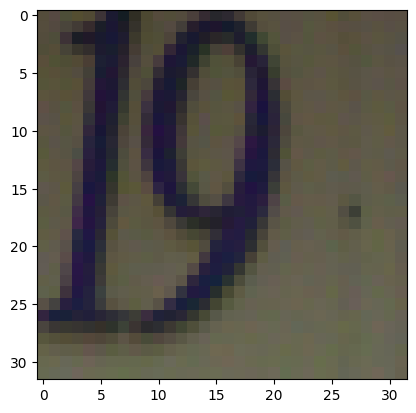

In [ ]:
# Basic example loading images from the svhn dataset
import scipy.io as sio
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
import torch.nn as nn

# Mount Google Drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/DL_yo/P3/Data/'
results_path = '/content/drive/MyDrive/DL_yo/P3/Results/'

# Load mat file with train images from SVHN
import scipy.io as sio
train_mat = sio.loadmat(data_path + 'svhn/train_32x32.mat')

images = train_mat['X']
labels = train_mat['y'].squeeze()

example_image, example_label = images[:,:,:,1], labels[1]
print('Label: ' + str(example_label))
plt.imshow(example_image)

# Ex. 1


'''
1. Try to obtain the maximum test accuracy possible in the SVHN dataset. For this purpose train/test different variants of the CNN provided in P3-Part1-Examples.
   You can explore different strategies:
1.1. Increase the size of the network by adding one ore more conv. layers. You can also increase the number of filters in each layer.
1.2. Try different optimizers such as Adam or SGD with momentum and modify the learning rate. You can check: https://pytorch.org/docs/stable/optim.html
1.3. Explore different random transformations during training ( Data augmentation ) such as random cropping with padding.
You can check: https://pytorch.org/docs/stable/torchvision/transforms.html . Remember that these random transofrmation must not be used during testing.
1.4 Whatever you consider...


2. Save all the different models , compare their test accuracy and analyse the results. Discuss what model has been shown more effective and why have you used the different strategies.
'''

# Sol. 1

In [ ]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from PIL import Image
import scipy.io

#Making native class loader
class SVHN(torch.utils.data.Dataset):
    # Initialization method for the dataset
    def __init__(self,dataDir = data_path+'/svhn/train_32x32.mat',transform = None):
        mat_loaded = sio.loadmat(dataDir)
        self.data = mat_loaded['X']
        self.labels = mat_loaded['y'].squeeze()

        #preprocess bc target labels of cross entropy expects from [0, num_class - 1] so transform [1, 10] -> [0, 9]
        self.labels -= self.labels.min()
        self.transform = transform
     # What to do to load a single item in the dataset ( read image and label)
    def __getitem__(self, index):
        data = self.data[:,:,:,index]
        lbl = self.labels[index]

        data = Image.fromarray(data)
        # Apply a trasnformaiton to the image if it is indicated in the initalizer
        if self.transform is not None :
            data = self.transform(data)

        # return the image and the label
        return data,lbl

        pass

    # Return the number of images
    def __len__(self):
        return self.data.shape[3]


In [ ]:
import torchvision.transforms as tf

# Compose a series of transformations that will be applied to the images
tr = tf.Compose([
    tf.ToTensor(),  # Converts an image loaded in range [0, 255] to a torch.Tensor in range [0.0, 1.0]
    tf.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Normalizes a tensor image with mean and standard deviation
])

# Initialize the custom dataset with the specified transformations
SVHNTrain = SVHN(data_path+'/svhn/train_32x32.mat', tr)

# Explanation of DataLoader:
# DataLoader is a powerful utility that handles data loading to your model in a way that enhances performance and scalability.
train_loader = torch.utils.data.DataLoader(dataset=SVHNTrain,  # The dataset from which to load the data.
                                                batch_size=128,  # The number of samples contained in each generated batch.
                                                shuffle=True)  # Whether to shuffle the data at every epoch to reduce model overfitting.

SVHNTest = SVHN(data_path+'/svhn/test_32x32.mat',tr)
test_loader = torch.utils.data.DataLoader(dataset=SVHNTest,
                                               batch_size=256,
                                               shuffle=True)


torch.Size([128, 3, 32, 32]) torch.Size([128])
Label :  tensor(2, dtype=torch.uint8)


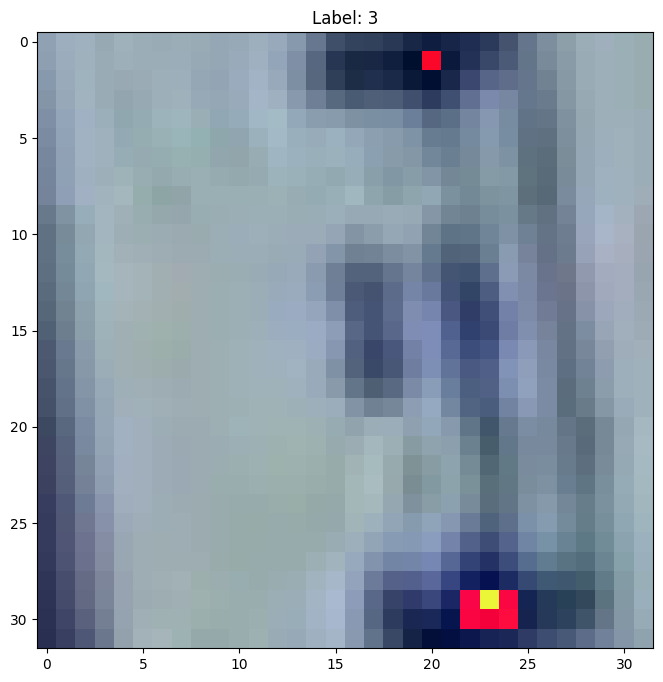

In [ ]:
images, labels = next(iter(train_loader))
print(images.shape, labels.shape)  # Print the shape of the images and labels tensors
print('Label : ', labels[0])       # Print the first label in the batch
plt.figure(figsize=(8,8))
plt.imshow(tf.ToPILImage()(images[0]))
plt.title(f'Label: {labels[0] + 1}')
plt.show()

lbl :  tensor(3, dtype=torch.uint8)


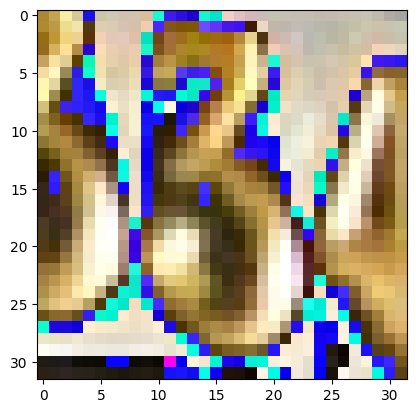

lbl :  tensor(2, dtype=torch.uint8)


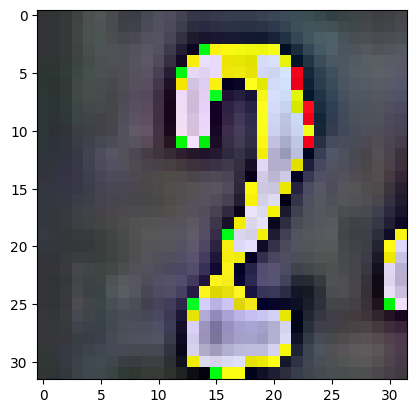

lbl :  tensor(7, dtype=torch.uint8)


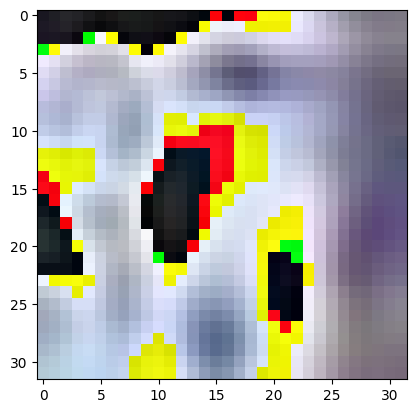

lbl :  tensor(10, dtype=torch.uint8)


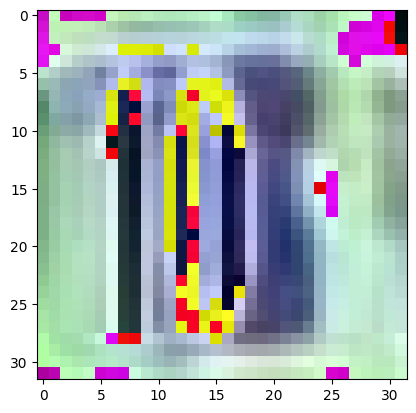

lbl :  tensor(1, dtype=torch.uint8)


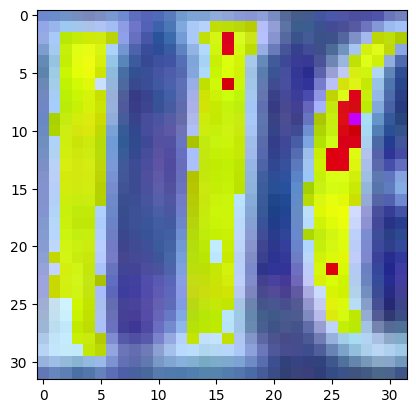

lbl :  tensor(1, dtype=torch.uint8)


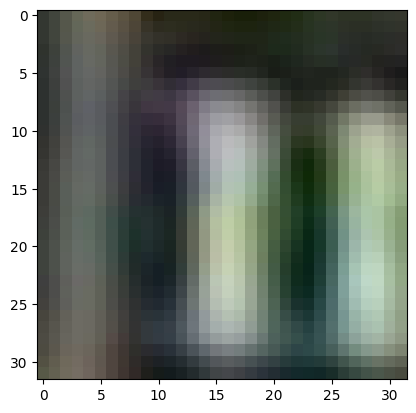

lbl :  tensor(5, dtype=torch.uint8)


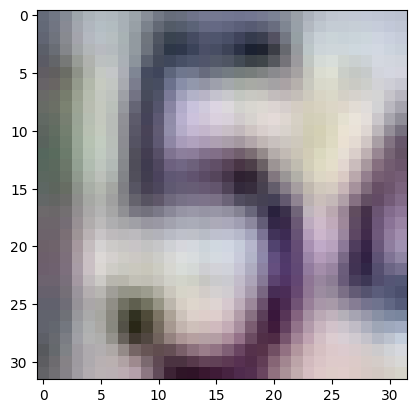

lbl :  tensor(1, dtype=torch.uint8)


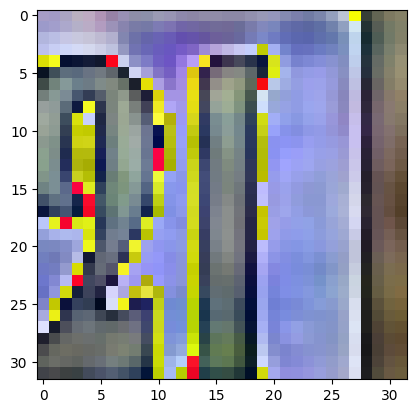

lbl :  tensor(5, dtype=torch.uint8)


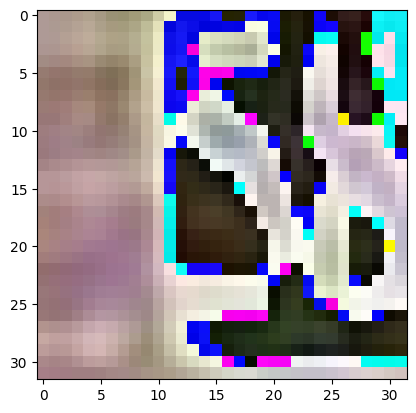

lbl :  tensor(9, dtype=torch.uint8)


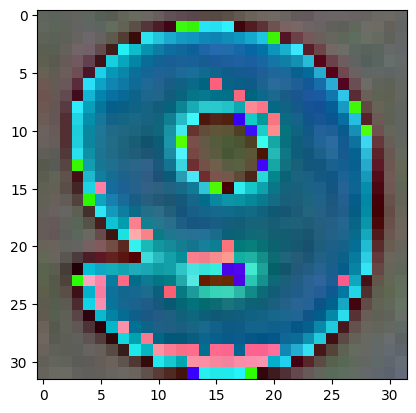

lbl :  tensor(6, dtype=torch.uint8)


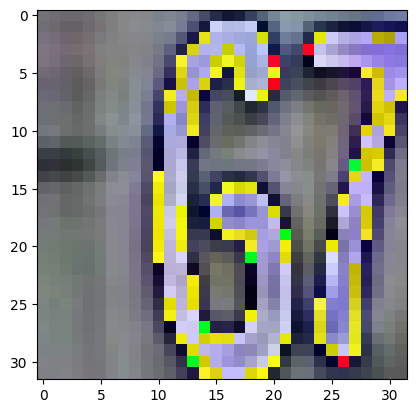

lbl :  tensor(2, dtype=torch.uint8)


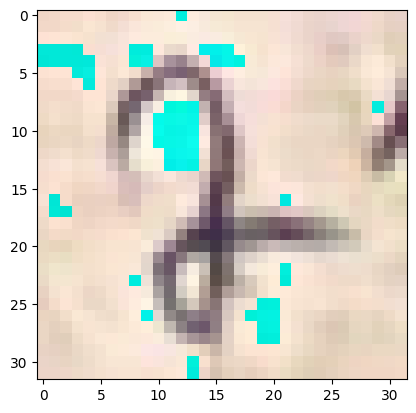

lbl :  tensor(7, dtype=torch.uint8)


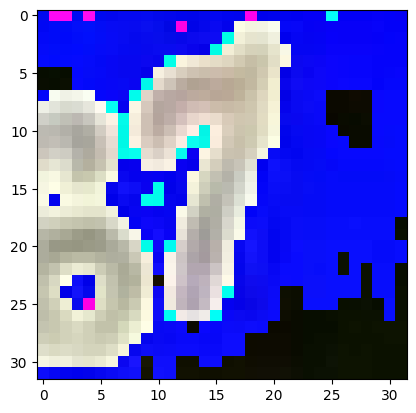

lbl :  tensor(3, dtype=torch.uint8)


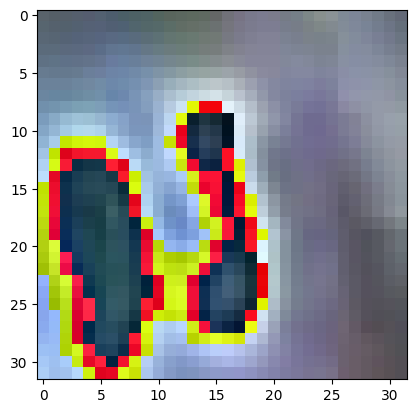

lbl :  tensor(6, dtype=torch.uint8)


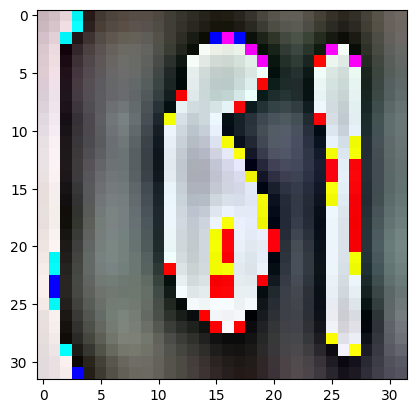

lbl :  tensor(6, dtype=torch.uint8)


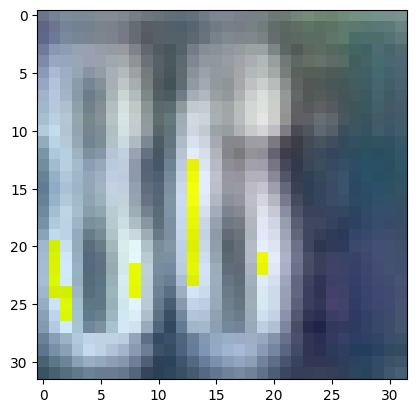

lbl :  tensor(9, dtype=torch.uint8)


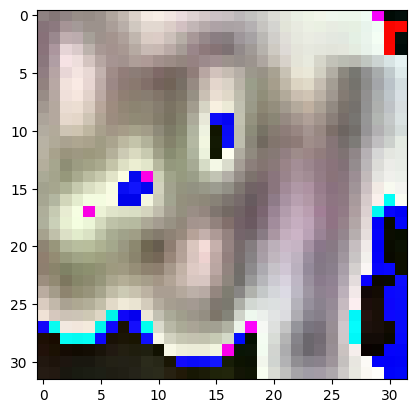

lbl :  tensor(6, dtype=torch.uint8)


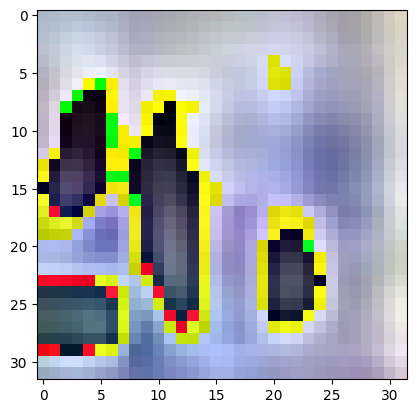

lbl :  tensor(3, dtype=torch.uint8)


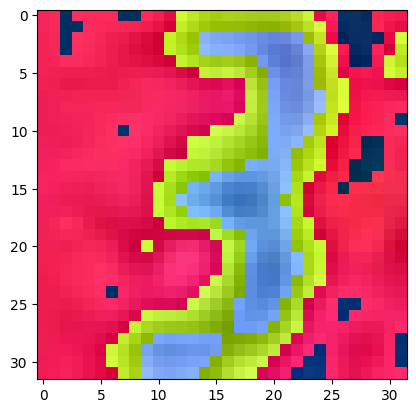

lbl :  tensor(6, dtype=torch.uint8)


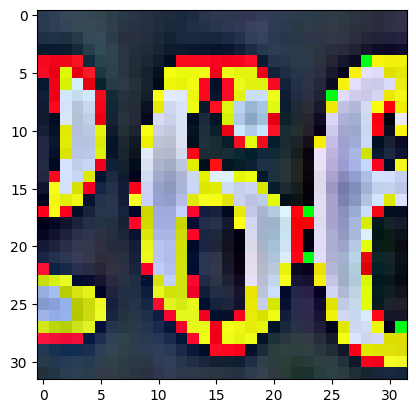

lbl :  tensor(5, dtype=torch.uint8)


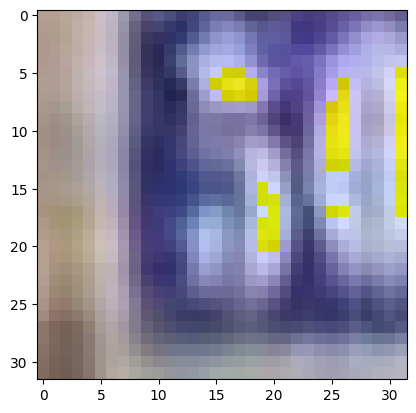

lbl :  tensor(8, dtype=torch.uint8)


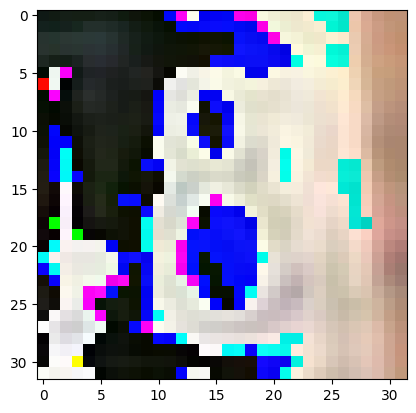

lbl :  tensor(5, dtype=torch.uint8)


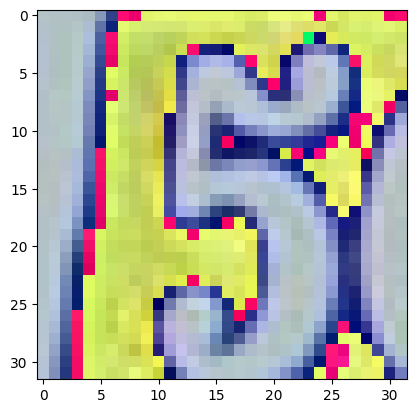

lbl :  tensor(1, dtype=torch.uint8)


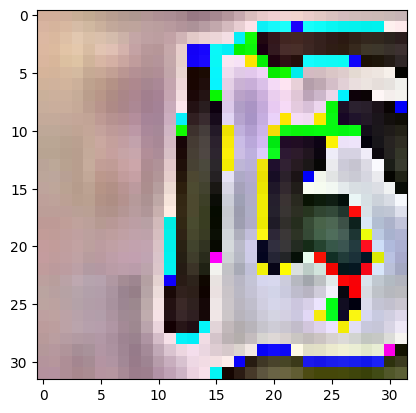

lbl :  tensor(2, dtype=torch.uint8)


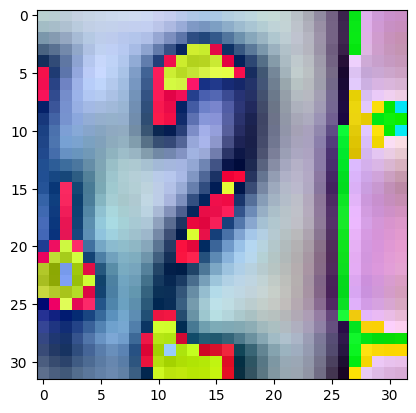

lbl :  tensor(8, dtype=torch.uint8)


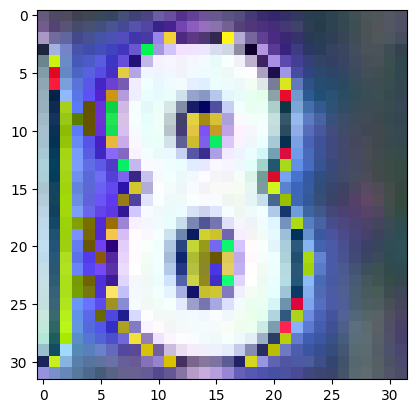

lbl :  tensor(8, dtype=torch.uint8)


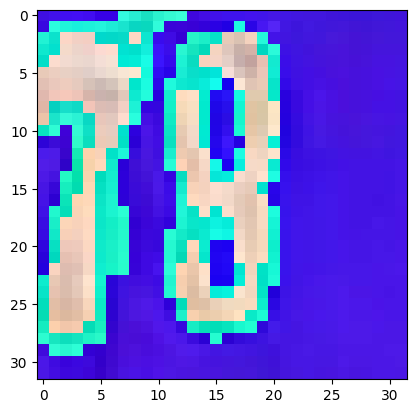

lbl :  tensor(5, dtype=torch.uint8)


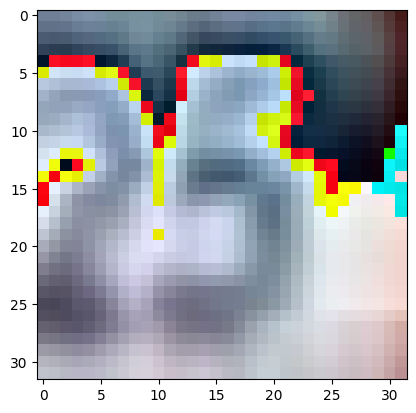

lbl :  tensor(2, dtype=torch.uint8)


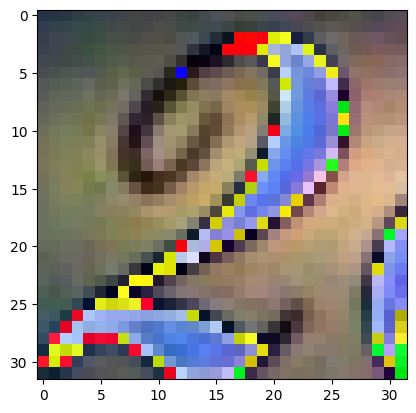

lbl :  tensor(2, dtype=torch.uint8)


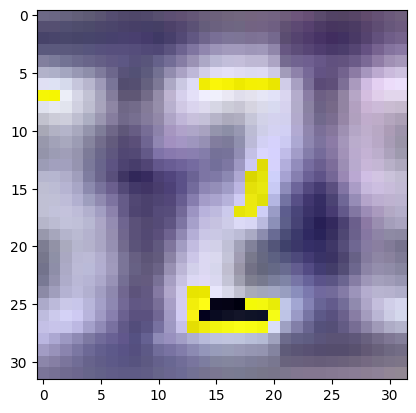

lbl :  tensor(3, dtype=torch.uint8)


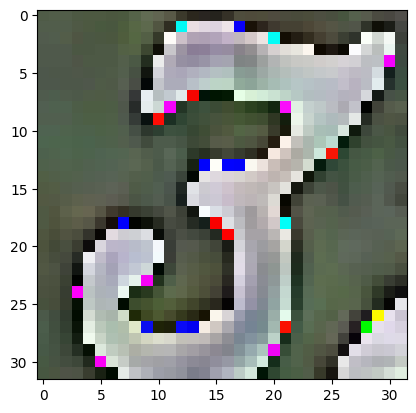

lbl :  tensor(4, dtype=torch.uint8)


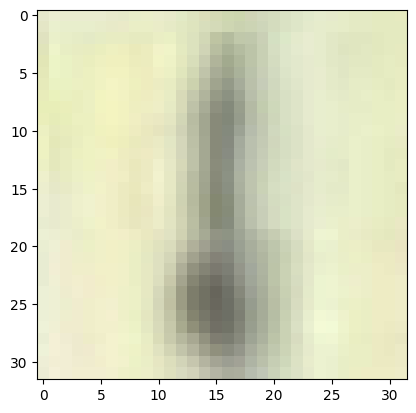

lbl :  tensor(1, dtype=torch.uint8)


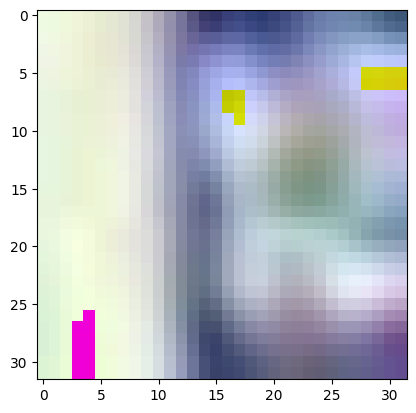

lbl :  tensor(2, dtype=torch.uint8)


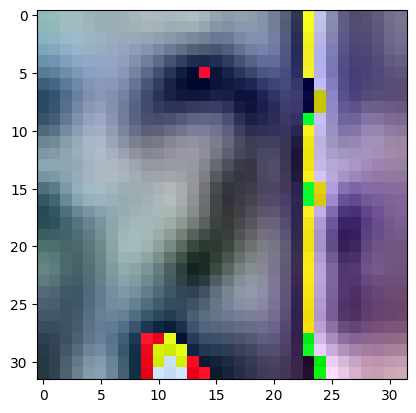

lbl :  tensor(1, dtype=torch.uint8)


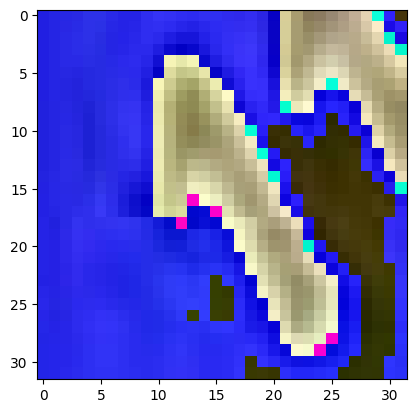

lbl :  tensor(3, dtype=torch.uint8)


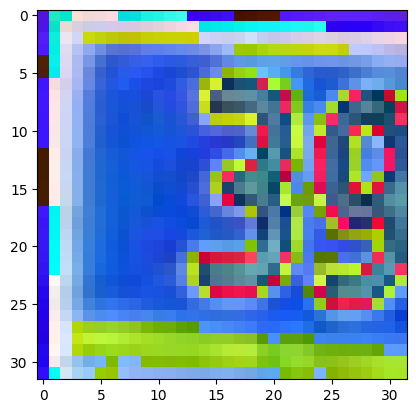

lbl :  tensor(1, dtype=torch.uint8)


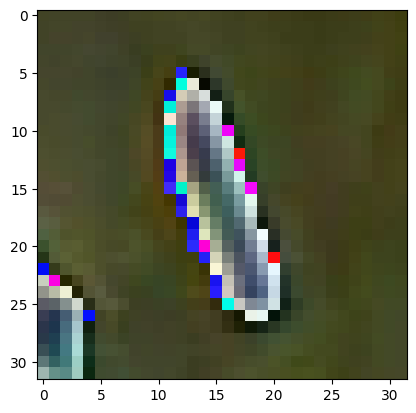

lbl :  tensor(7, dtype=torch.uint8)


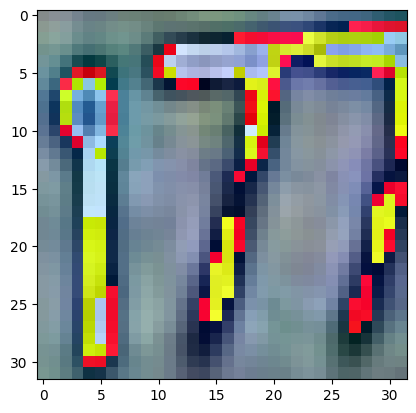

lbl :  tensor(4, dtype=torch.uint8)


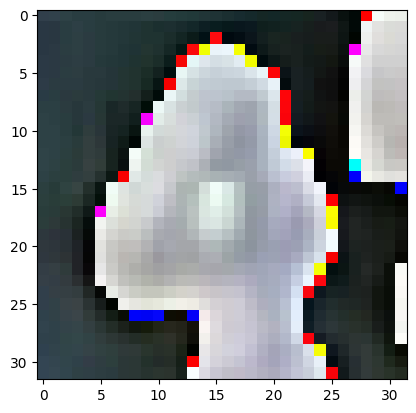

lbl :  tensor(1, dtype=torch.uint8)


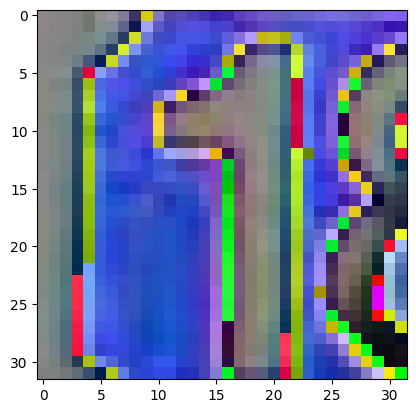

lbl :  tensor(5, dtype=torch.uint8)


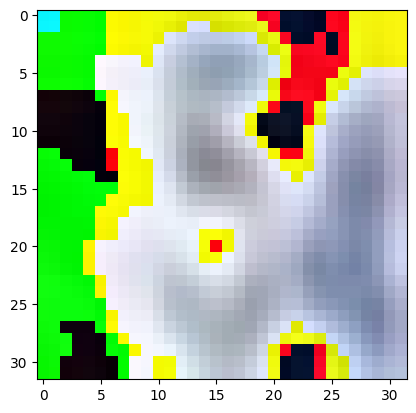

lbl :  tensor(8, dtype=torch.uint8)


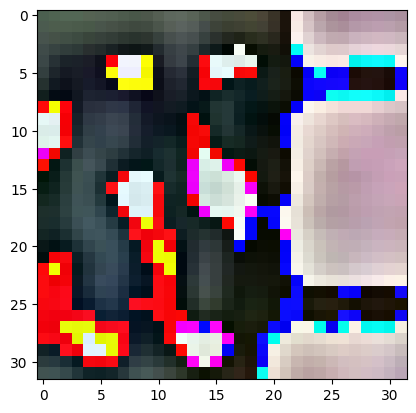

lbl :  tensor(5, dtype=torch.uint8)


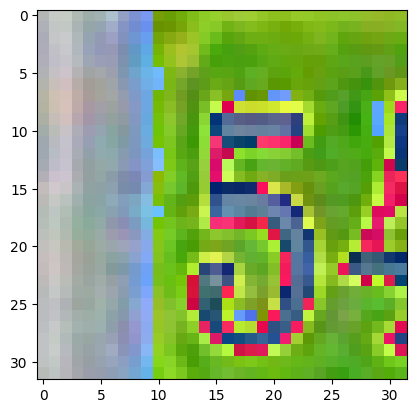

lbl :  tensor(2, dtype=torch.uint8)


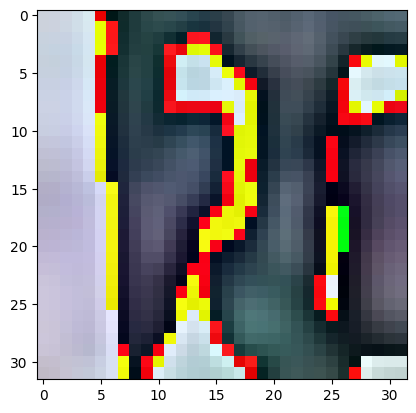

lbl :  tensor(1, dtype=torch.uint8)


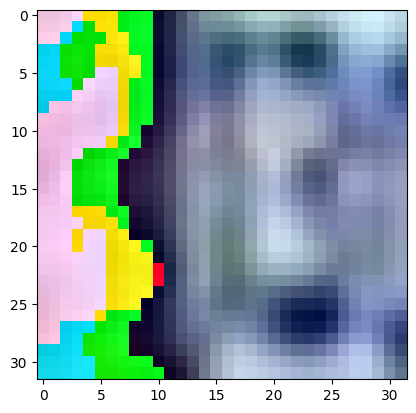

lbl :  tensor(3, dtype=torch.uint8)


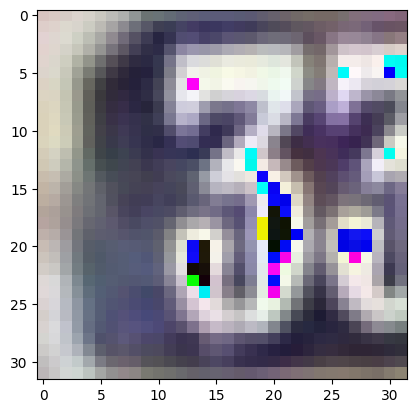

lbl :  tensor(8, dtype=torch.uint8)


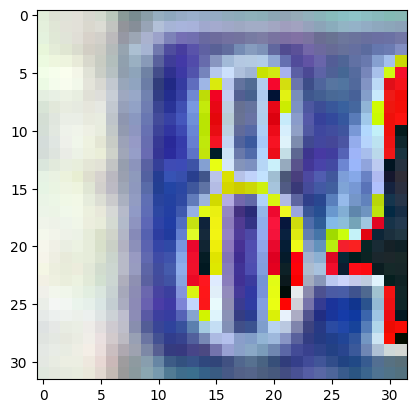

lbl :  tensor(6, dtype=torch.uint8)


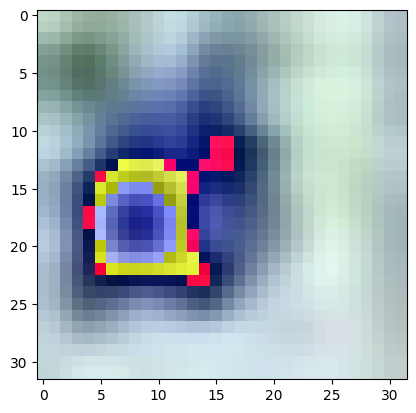

lbl :  tensor(6, dtype=torch.uint8)


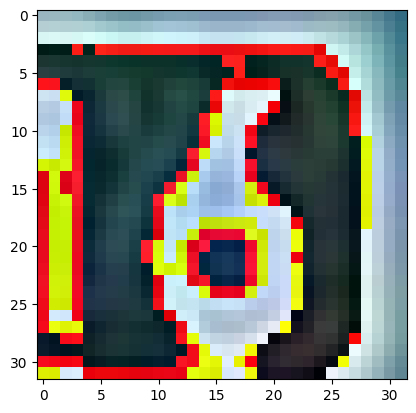

lbl :  tensor(6, dtype=torch.uint8)


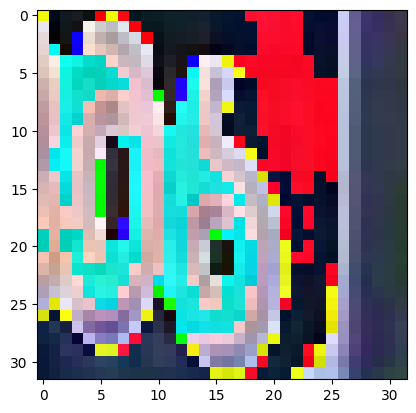

lbl :  tensor(4, dtype=torch.uint8)


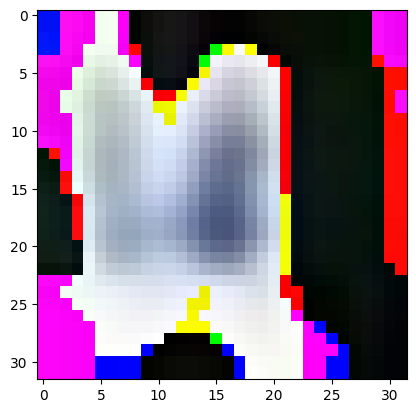

lbl :  tensor(8, dtype=torch.uint8)


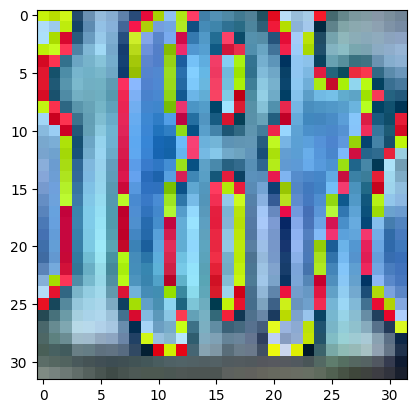

lbl :  tensor(2, dtype=torch.uint8)


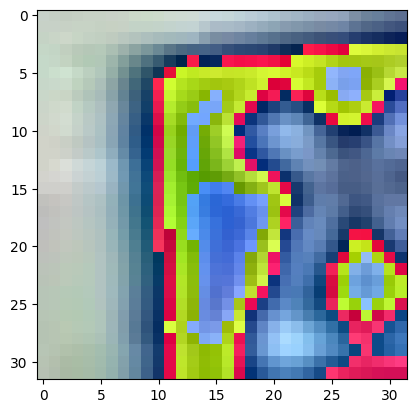

lbl :  tensor(2, dtype=torch.uint8)


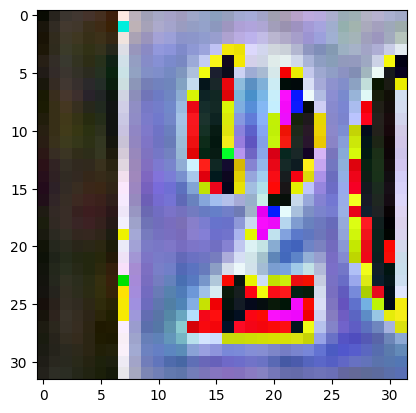

lbl :  tensor(8, dtype=torch.uint8)


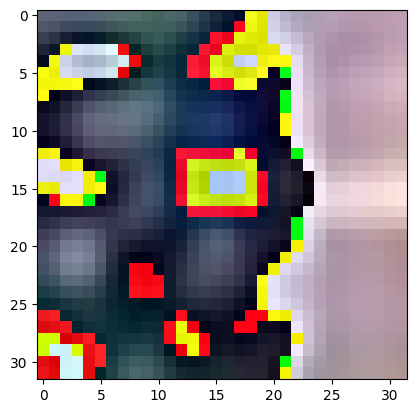

lbl :  tensor(2, dtype=torch.uint8)


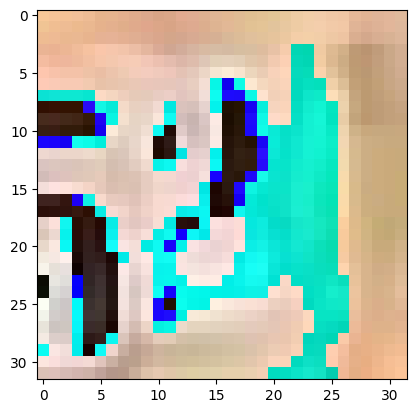

lbl :  tensor(6, dtype=torch.uint8)


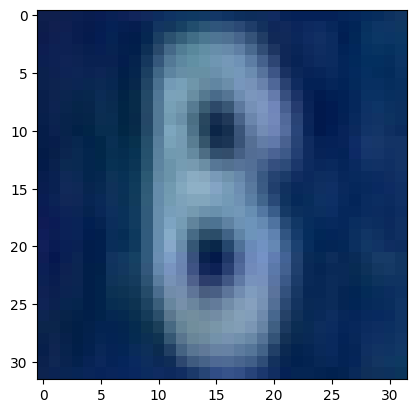

lbl :  tensor(4, dtype=torch.uint8)


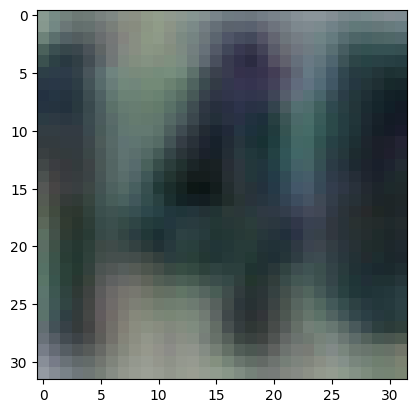

lbl :  tensor(2, dtype=torch.uint8)


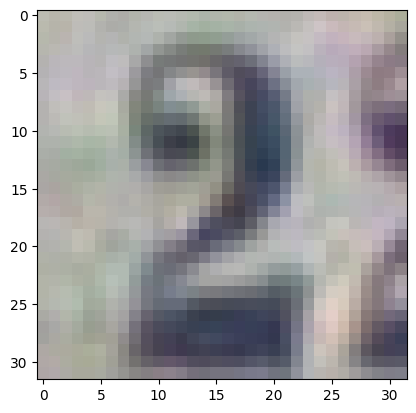

lbl :  tensor(2, dtype=torch.uint8)


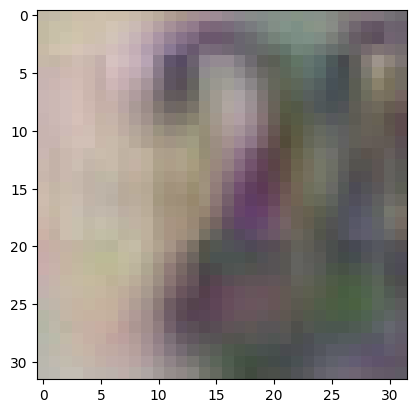

lbl :  tensor(5, dtype=torch.uint8)


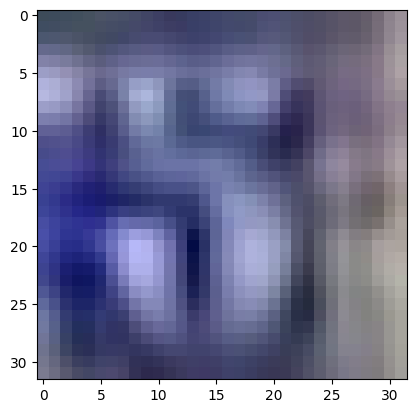

lbl :  tensor(7, dtype=torch.uint8)


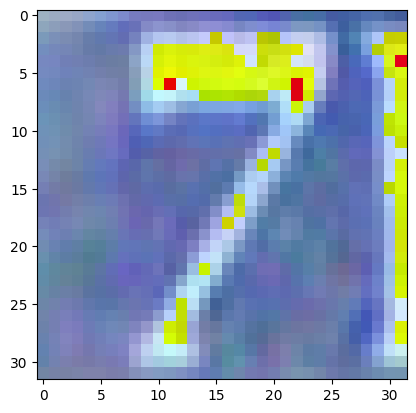

lbl :  tensor(7, dtype=torch.uint8)


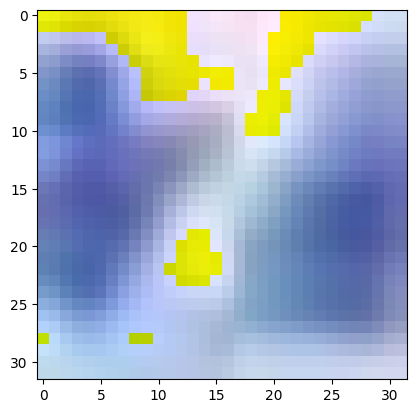

lbl :  tensor(1, dtype=torch.uint8)


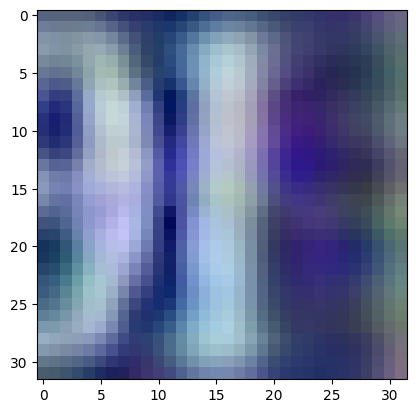

lbl :  tensor(1, dtype=torch.uint8)


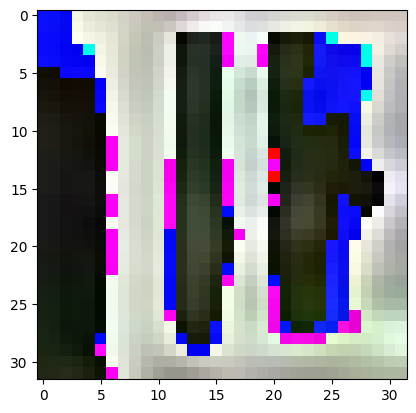

lbl :  tensor(5, dtype=torch.uint8)


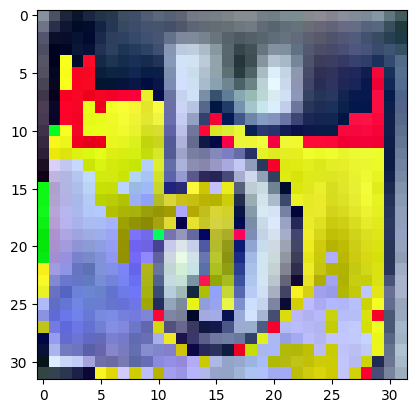

lbl :  tensor(4, dtype=torch.uint8)


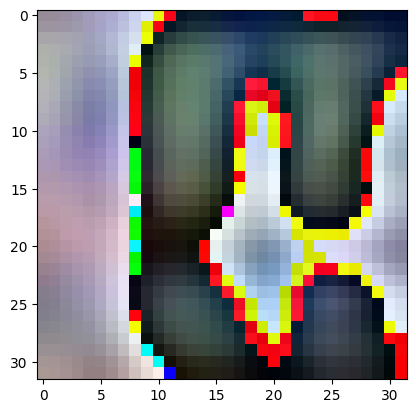

lbl :  tensor(10, dtype=torch.uint8)


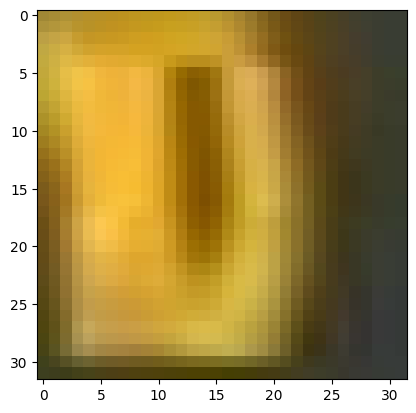

lbl :  tensor(8, dtype=torch.uint8)


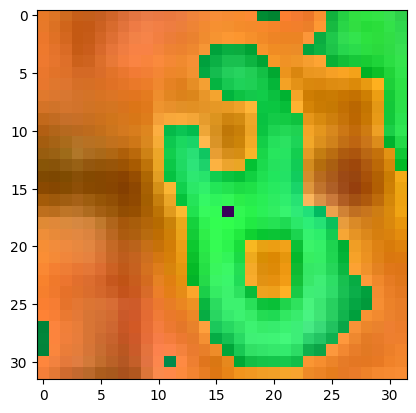

lbl :  tensor(7, dtype=torch.uint8)


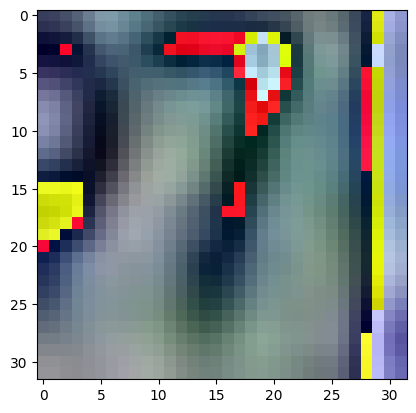

lbl :  tensor(3, dtype=torch.uint8)


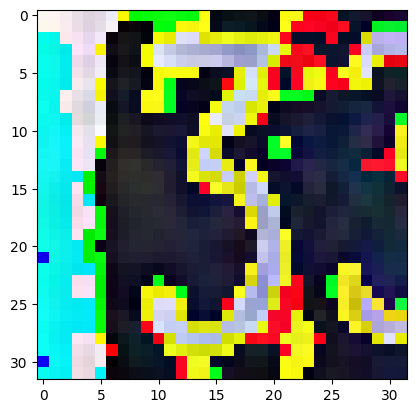

lbl :  tensor(5, dtype=torch.uint8)


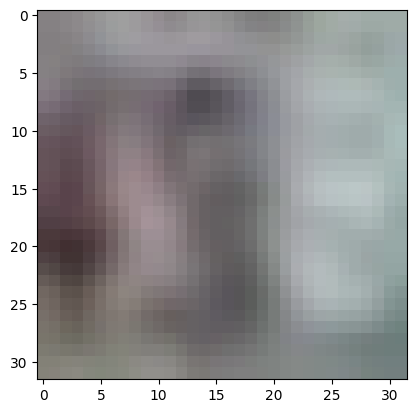

lbl :  tensor(1, dtype=torch.uint8)


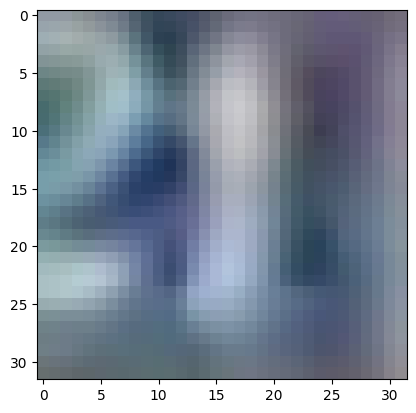

lbl :  tensor(1, dtype=torch.uint8)


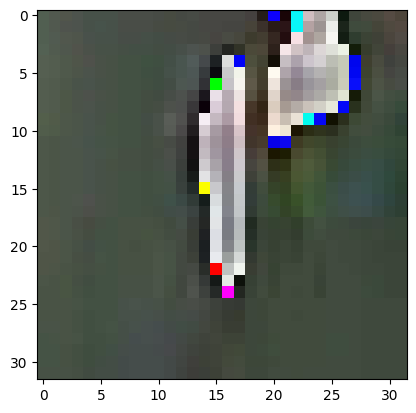

lbl :  tensor(10, dtype=torch.uint8)


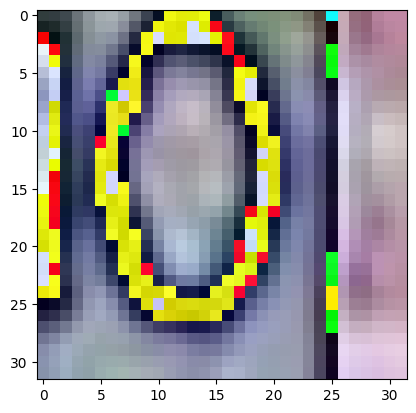

lbl :  tensor(1, dtype=torch.uint8)


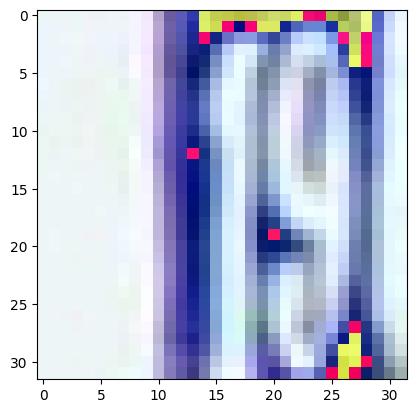

lbl :  tensor(1, dtype=torch.uint8)


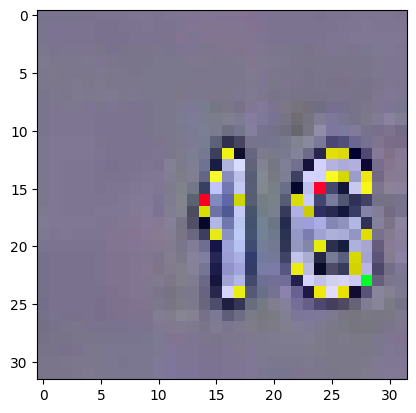

lbl :  tensor(1, dtype=torch.uint8)


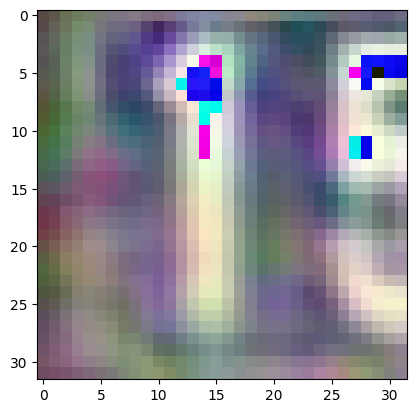

lbl :  tensor(1, dtype=torch.uint8)


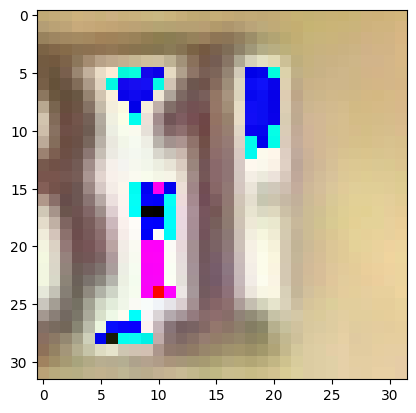

lbl :  tensor(1, dtype=torch.uint8)


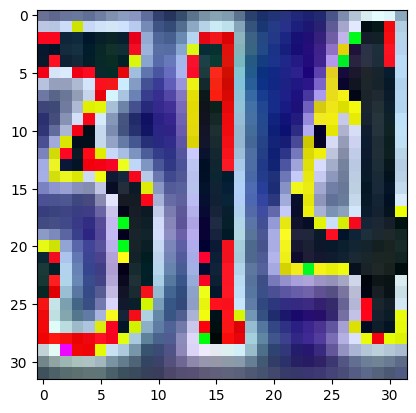

lbl :  tensor(5, dtype=torch.uint8)


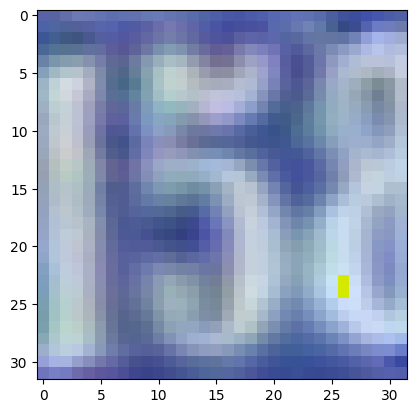

lbl :  tensor(6, dtype=torch.uint8)


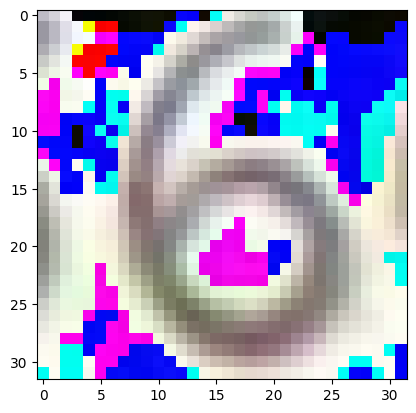

lbl :  tensor(1, dtype=torch.uint8)


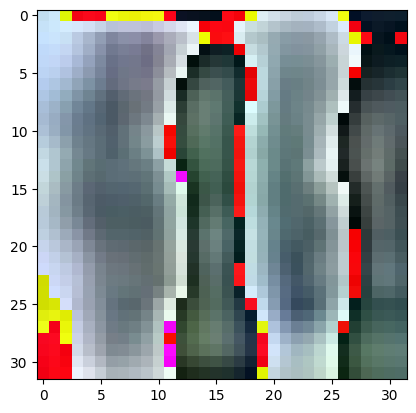

lbl :  tensor(3, dtype=torch.uint8)


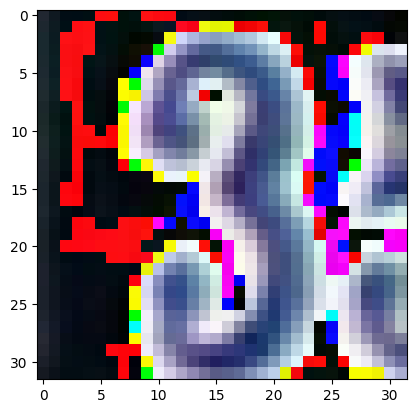

lbl :  tensor(5, dtype=torch.uint8)


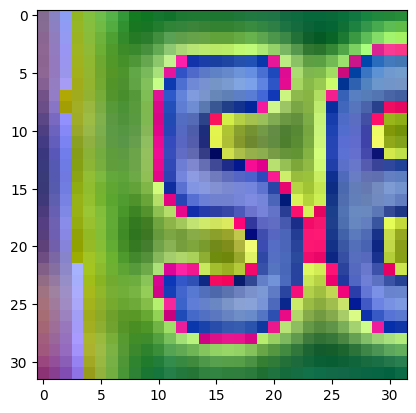

lbl :  tensor(8, dtype=torch.uint8)


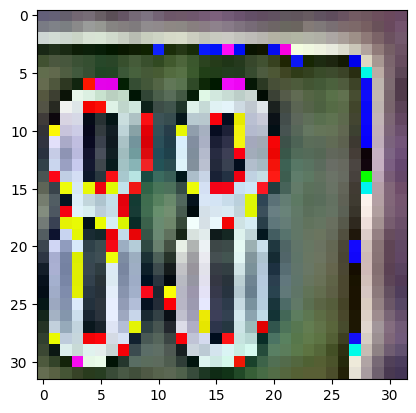

lbl :  tensor(7, dtype=torch.uint8)


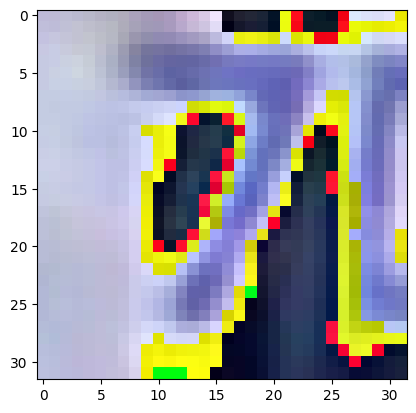

lbl :  tensor(8, dtype=torch.uint8)


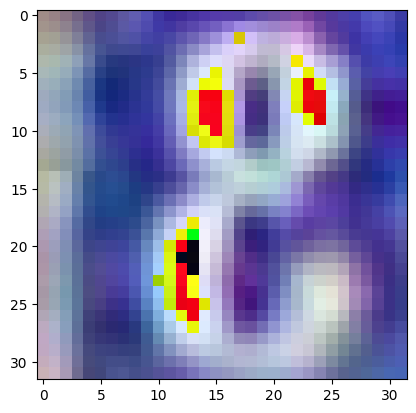

lbl :  tensor(10, dtype=torch.uint8)


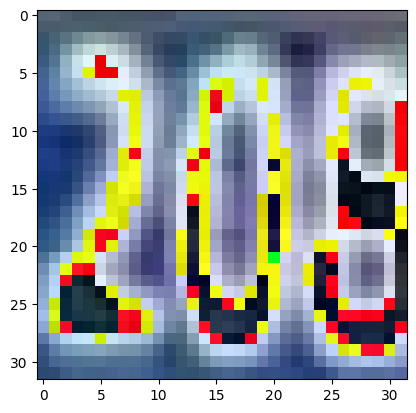

lbl :  tensor(1, dtype=torch.uint8)


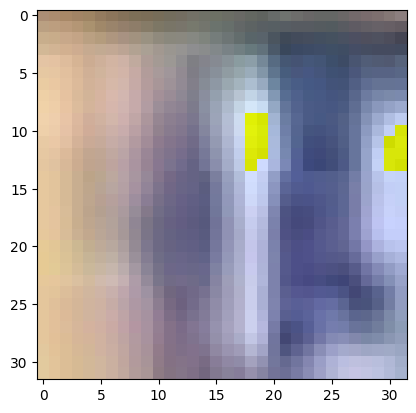

lbl :  tensor(7, dtype=torch.uint8)


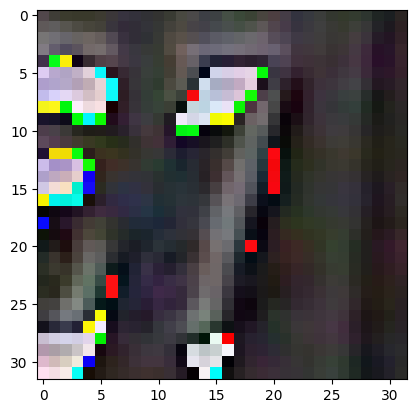

lbl :  tensor(9, dtype=torch.uint8)


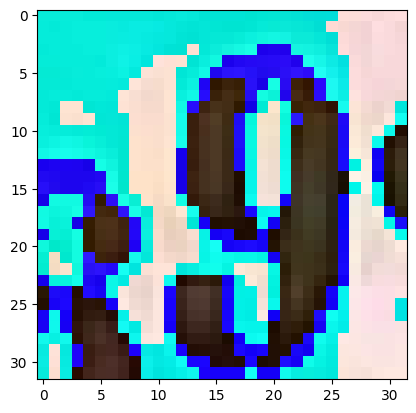

lbl :  tensor(2, dtype=torch.uint8)


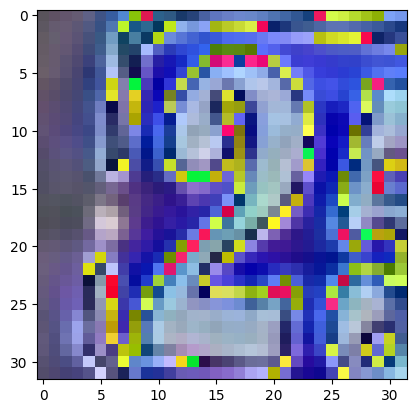

lbl :  tensor(2, dtype=torch.uint8)


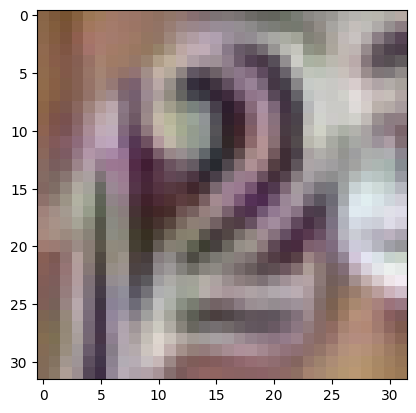

lbl :  tensor(4, dtype=torch.uint8)


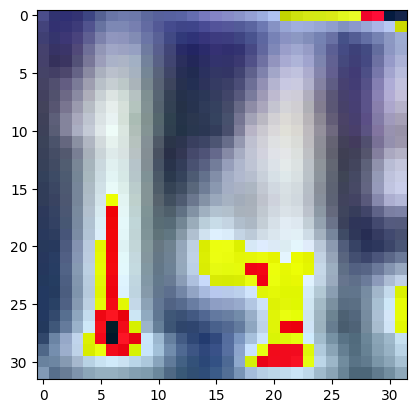

lbl :  tensor(5, dtype=torch.uint8)


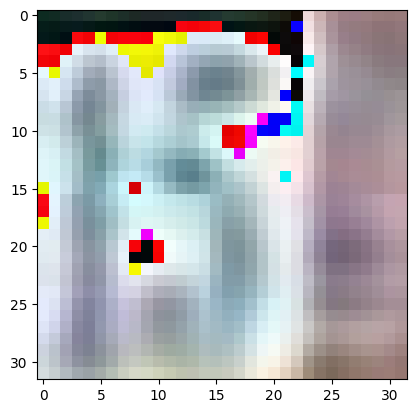

lbl :  tensor(3, dtype=torch.uint8)


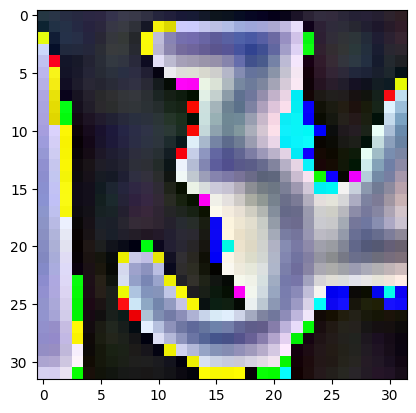

lbl :  tensor(6, dtype=torch.uint8)


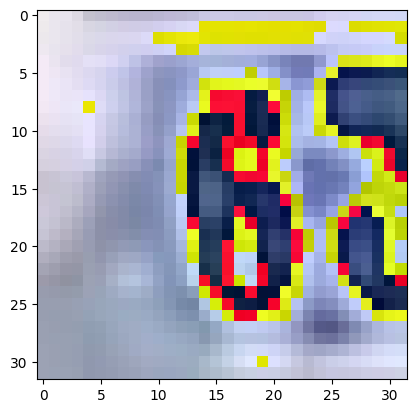

lbl :  tensor(4, dtype=torch.uint8)


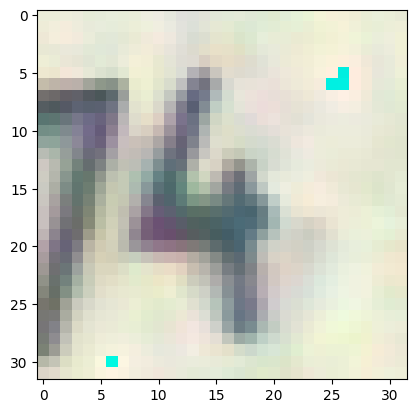

lbl :  tensor(9, dtype=torch.uint8)


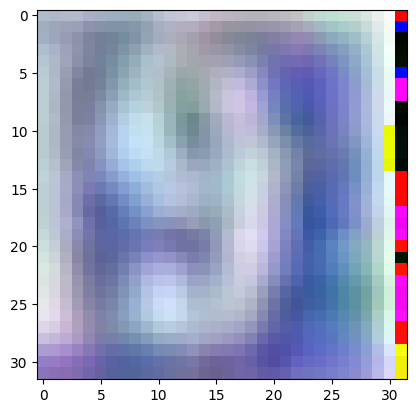

lbl :  tensor(9, dtype=torch.uint8)


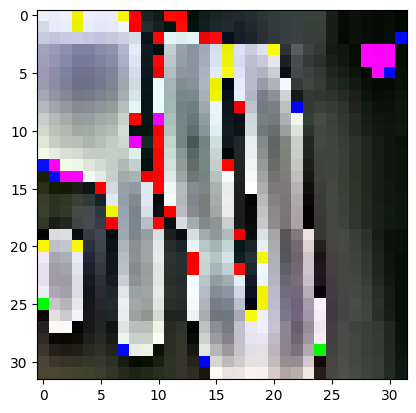

lbl :  tensor(2, dtype=torch.uint8)


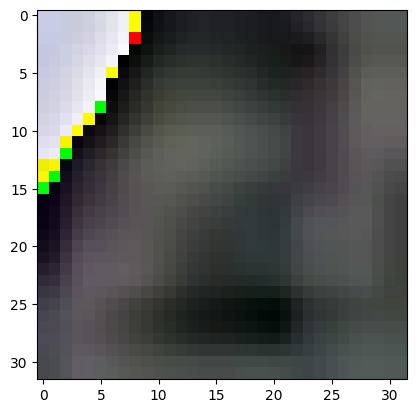

lbl :  tensor(8, dtype=torch.uint8)


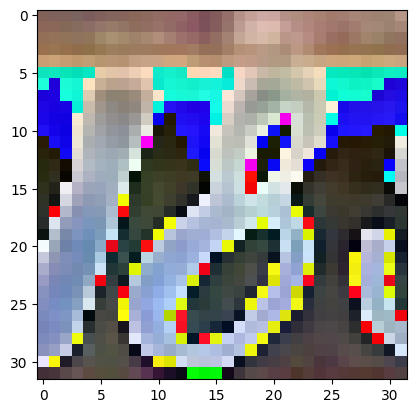

lbl :  tensor(2, dtype=torch.uint8)


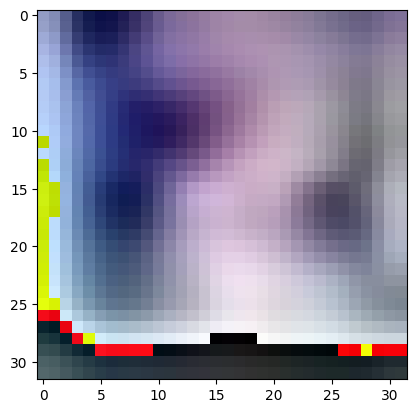

lbl :  tensor(6, dtype=torch.uint8)


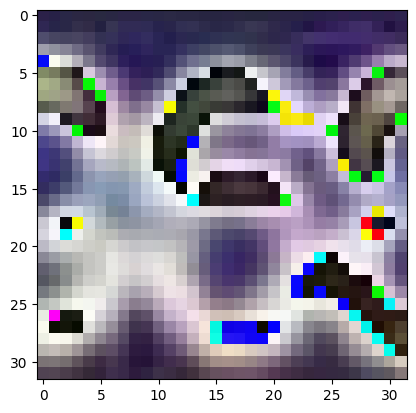

lbl :  tensor(2, dtype=torch.uint8)


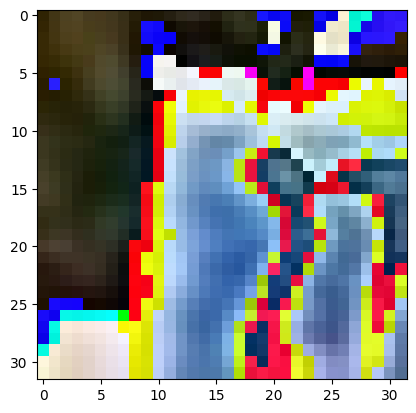

lbl :  tensor(1, dtype=torch.uint8)


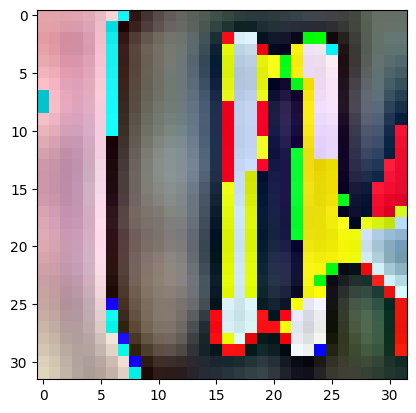

lbl :  tensor(5, dtype=torch.uint8)


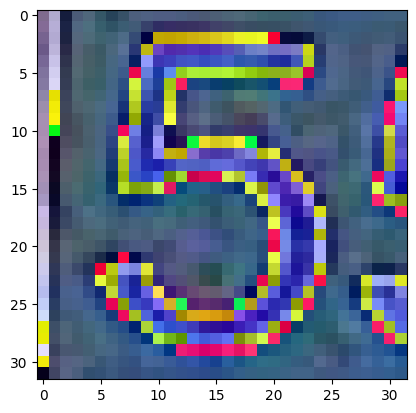

lbl :  tensor(7, dtype=torch.uint8)


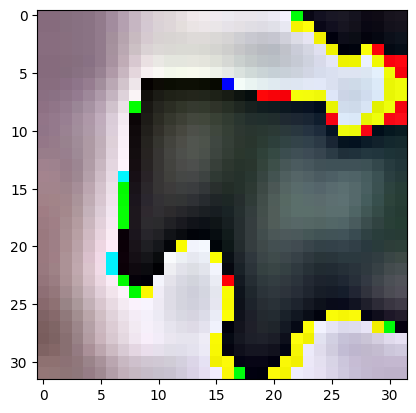

lbl :  tensor(9, dtype=torch.uint8)


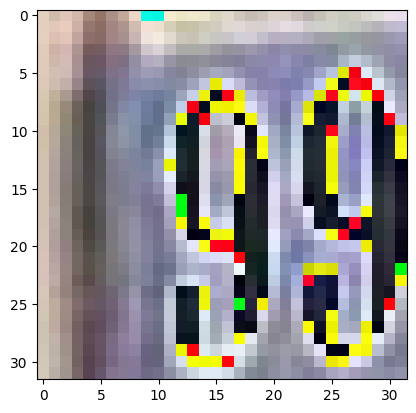

lbl :  tensor(2, dtype=torch.uint8)


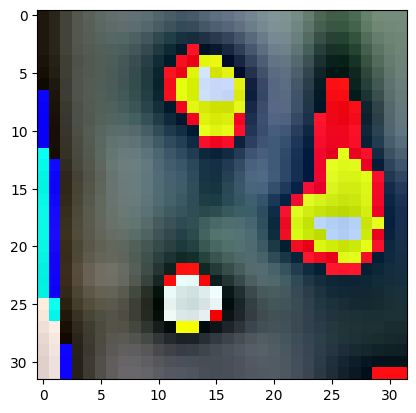

lbl :  tensor(1, dtype=torch.uint8)


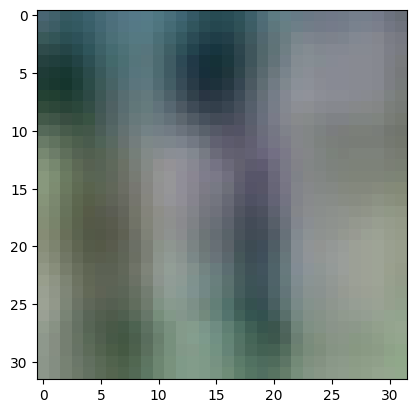

lbl :  tensor(2, dtype=torch.uint8)


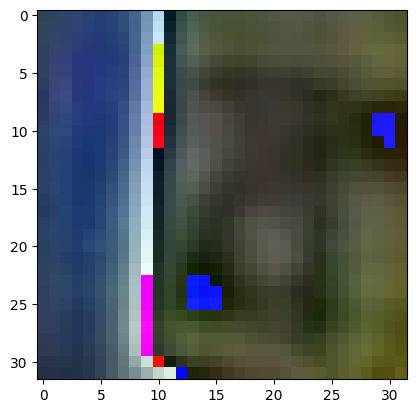

lbl :  tensor(10, dtype=torch.uint8)


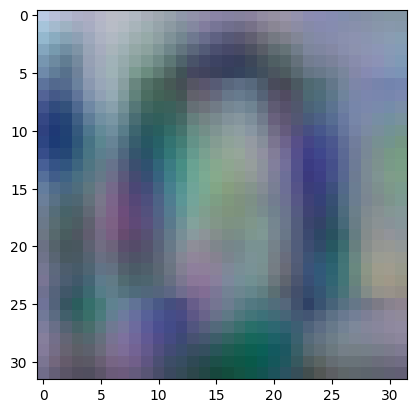

lbl :  tensor(6, dtype=torch.uint8)


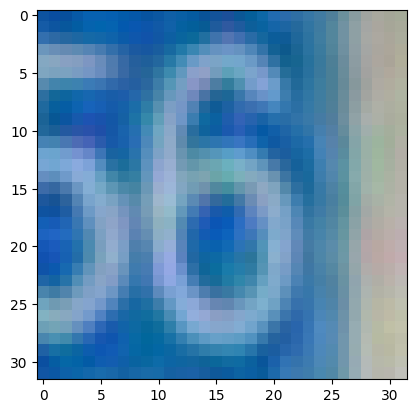

lbl :  tensor(8, dtype=torch.uint8)


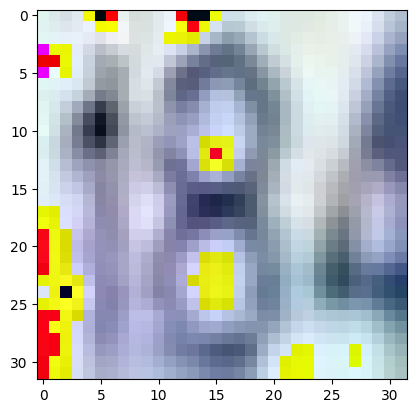

lbl :  tensor(8, dtype=torch.uint8)


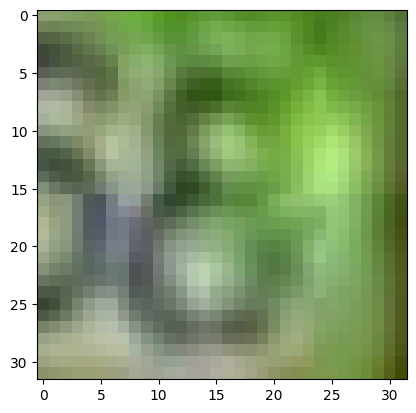

lbl :  tensor(9, dtype=torch.uint8)


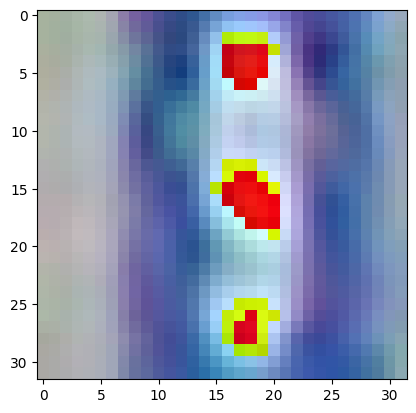

lbl :  tensor(3, dtype=torch.uint8)


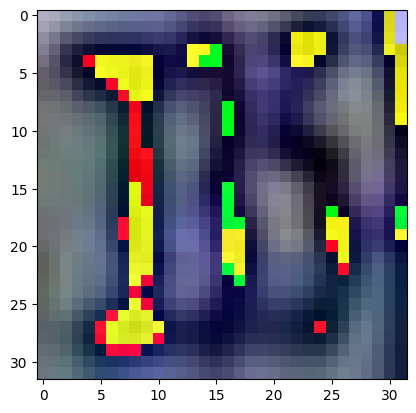

lbl :  tensor(2, dtype=torch.uint8)


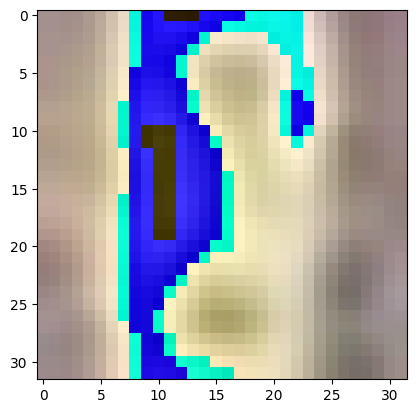

lbl :  tensor(4, dtype=torch.uint8)


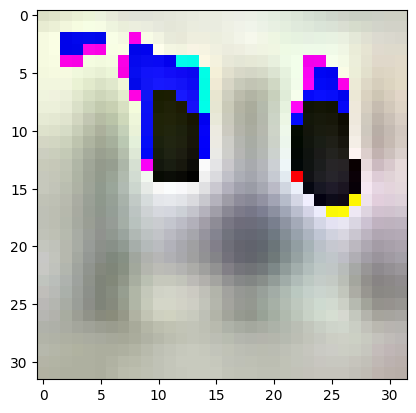

lbl :  tensor(6, dtype=torch.uint8)


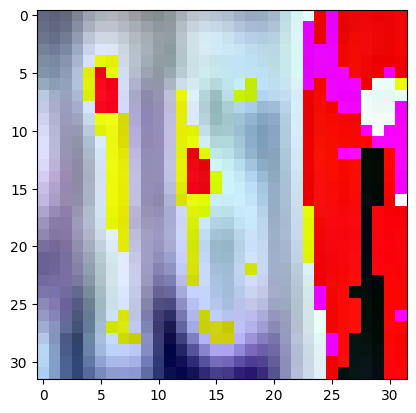

lbl :  tensor(3, dtype=torch.uint8)


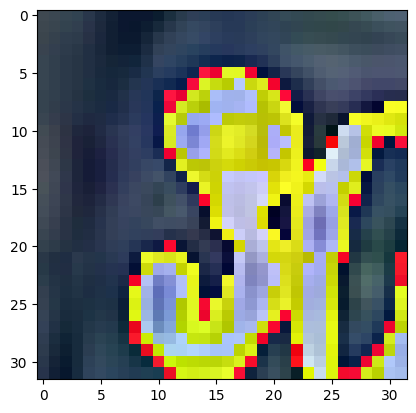

lbl :  tensor(2, dtype=torch.uint8)


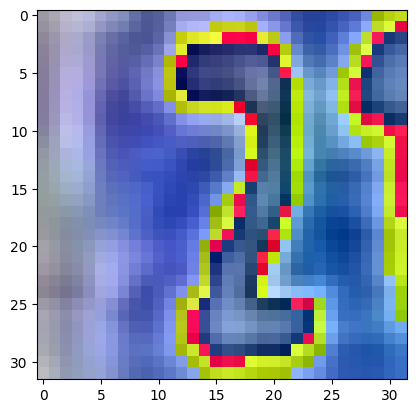

lbl :  tensor(4, dtype=torch.uint8)


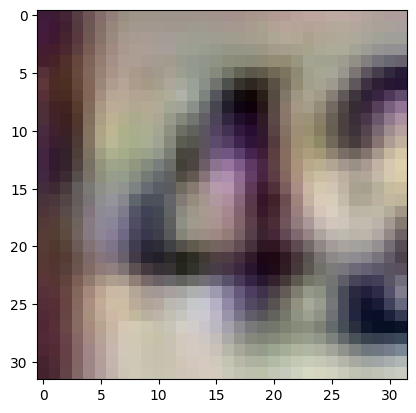

lbl :  tensor(4, dtype=torch.uint8)


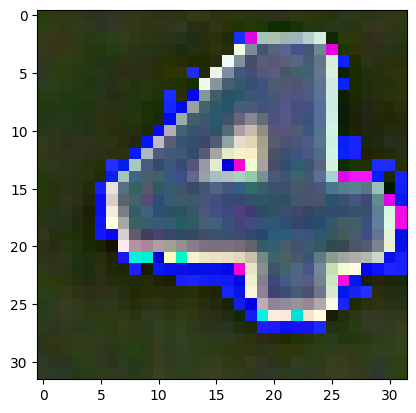

lbl :  tensor(7, dtype=torch.uint8)


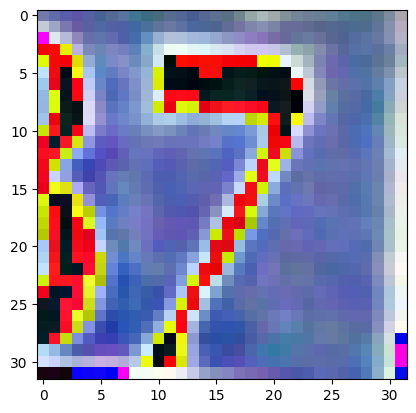

lbl :  tensor(8, dtype=torch.uint8)


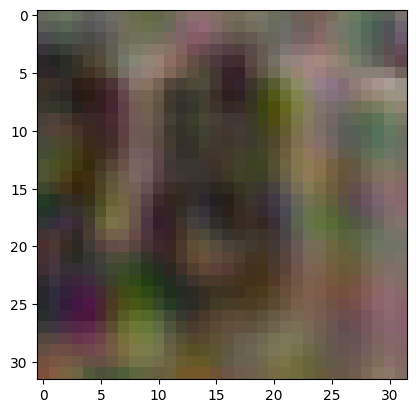

In [ ]:
# Actual usage of the data loader is as below.
import torchvision.transforms.functional as TF

for images, labels in train_loader:
  for img,lbl in zip(images,labels):
    print('lbl : ',lbl + 1)
    plt.imshow(TF.to_pil_image(img))
    plt.show()
  break

In [ ]:
# Define an standard CNN -> Two conv. blocks and linear layer
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):

        super(ConvNet, self).__init__()

        self.conv1 = nn.Conv2d(3, 16, kernel_size=5,  padding=2)
        #input : 3 channels, output 16 channel, filter size : 5x5

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3,  padding=1)

        self.fc = nn.Linear(32 * 8 * 8 , num_classes)

        self.maxpool= nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()

    def forward(self, x):

        out = self.conv1(x)
        out = self.relu(out)
        out = self.maxpool(out)

        out = self.conv2(out)
        out = self.relu(out)
        out = self.maxpool(out)

        out = out.reshape(out.size(0), -1) #128,32,28,28 -> 128,28*28*32
        out = self.fc(out) # we don't need sigmoid or other activation function at the end beacuse we will use nn.CrossEntropyLoss() (check documentation to understand why)

        return out



In [ ]:
CNN = ConvNet()
CNN = CNN.cuda()

# Cross entropy loss for classification problems
criterion = nn.CrossEntropyLoss()

#Initialize optimizer
learning_rate = .001
optimizer = torch.optim.Adam(CNN.parameters(), lr = learning_rate)


# Device configuration (choose GPU if it is available )
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
num_epochs = 5

CNN.train() # Set the model in train mode
total_step = len(train_loader)
losses_list = []
criterion = nn.CrossEntropyLoss()
# Iterate over epochs
for epoch in range(num_epochs):
    # Iterate the dataset
    loss_avg = 0
    nBatches = 0
    for i, (images, labels) in enumerate(train_loader):
        # Get batch of samples and labels
        images = images.to(device)
        labels = labels.type(torch.LongTensor).to(device)

        # Forward pass
        outputs = CNN(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_avg += loss.cpu().item()
        nBatches+=1
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss_avg / nBatches))
    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss_avg / nBatches))
    losses_list.append(loss_avg / nBatches)
torch.save(CNN.state_dict(), results_path+'/model.ckpt')  # Save the model


Epoch [1/5], Step [100/573], Loss: 1.9518
Epoch [1/5], Step [200/573], Loss: 1.4433
Epoch [1/5], Step [300/573], Loss: 1.2009
Epoch [1/5], Step [400/573], Loss: 1.0608
Epoch [1/5], Step [500/573], Loss: 0.9680
Epoch [1/5], Step [573/573], Loss: 0.9200
Epoch [2/5], Step [100/573], Loss: 0.5491
Epoch [2/5], Step [200/573], Loss: 0.5483
Epoch [2/5], Step [300/573], Loss: 0.5371
Epoch [2/5], Step [400/573], Loss: 0.5309
Epoch [2/5], Step [500/573], Loss: 0.5220
Epoch [2/5], Step [573/573], Loss: 0.5169
Epoch [3/5], Step [100/573], Loss: 0.4437
Epoch [3/5], Step [200/573], Loss: 0.4545
Epoch [3/5], Step [300/573], Loss: 0.4585
Epoch [3/5], Step [400/573], Loss: 0.4542
Epoch [3/5], Step [500/573], Loss: 0.4516
Epoch [3/5], Step [573/573], Loss: 0.4513
Epoch [4/5], Step [100/573], Loss: 0.4009
Epoch [4/5], Step [200/573], Loss: 0.4064
Epoch [4/5], Step [300/573], Loss: 0.4101
Epoch [4/5], Step [400/573], Loss: 0.4131
Epoch [4/5], Step [500/573], Loss: 0.4129
Epoch [4/5], Step [573/573], Loss:

In [ ]:
def accuracy(test_loader, CNN):
  with torch.no_grad():
          correct = 0
          total = 0
          for images, labels in test_loader:
              images = images.to(device)
              labels = labels.to(device)
              # get network predictions
              outputs = CNN(images)

              # get predicted class
              _, predicted = torch.max(outputs.data, 1)

              # compare with the ground-truth
              total += labels.size(0)
              correct += (predicted == labels).sum().item()
          # return accuracy
          acc = 100 * correct / total
  return acc

In [ ]:
acc = accuracy(test_loader, CNN)
print("Test accuracy:", acc)

Test accuracy: 86.46665642286416


In [ ]:
import random

# Function to detransform an image
def detransform(image, mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)):
    for t, m, s in zip(image, mean, std):
        t.mul_(s).add_(m)  # Scale by std and add mean
    return image

def plot_predicted(test_loader, CNN):
    with torch.no_grad():
          for images, labels in test_loader:
              images = images.to(device)
              labels = labels.to(device)
              # get network predictions
              outputs = CNN(images)

              # get predicted class
              _, predicted = torch.max(outputs.data, 1)

    # Visualize a random batch of predictions
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
    fig.suptitle('Random Batch Predictions with Labels')

    # Shuffle the indices to randomly pick images
    indices = list(range(len(images)))
    random.shuffle(indices)

    for idx, ax in enumerate(axes.flatten()):
        if idx >= len(indices):  # Check if the index is beyond the available number of images
            break
        img_idx = indices[idx]
        img = images[img_idx].cpu()
        img = detransform(img)  # Detransform the image
        img = img.numpy().transpose(1, 2, 0)  # Convert to numpy array and transpose to (height, width, channels)
        img = np.clip(img, 0, 1)  # Clip the values to be in the range [0, 1]

        pred = predicted[img_idx]

        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f'Pred: {pred.item()+1}')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


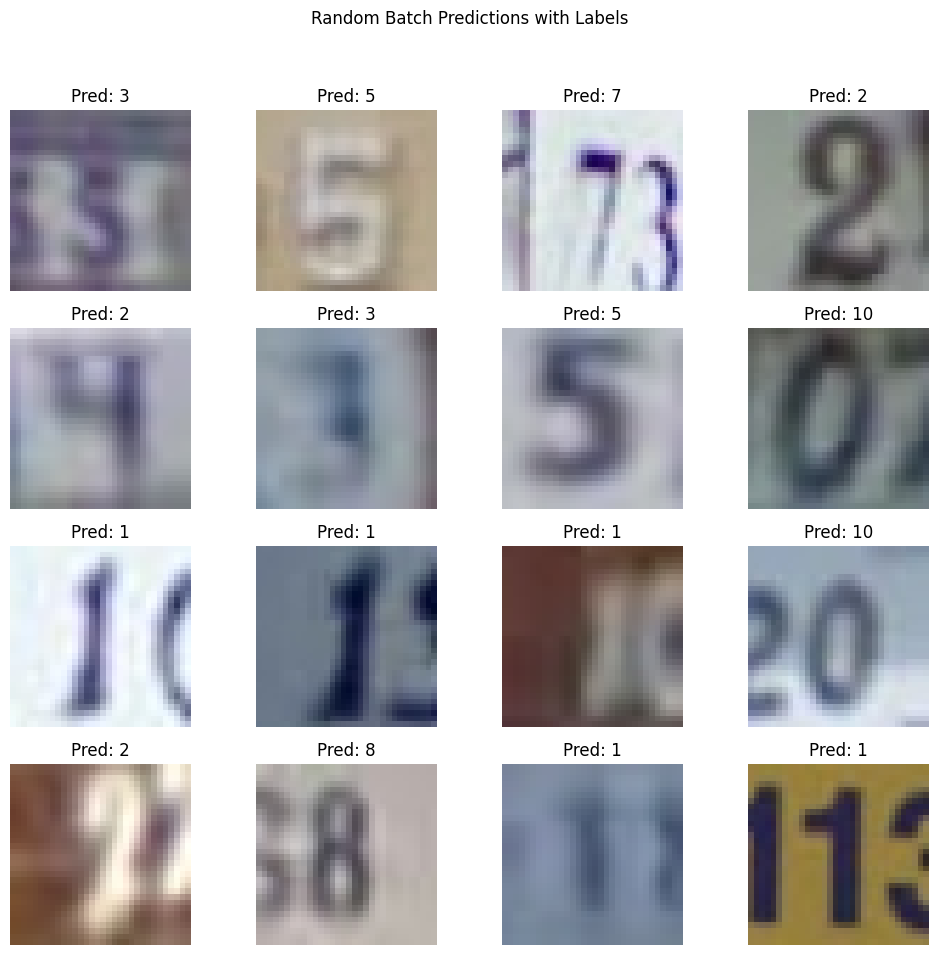

In [ ]:
plot_predicted(test_loader, CNN)

In [ ]:
#ADD MORE CONV LAYERS
##MORE CONV LAEYRS AGAIN
class ConvNet2(nn.Module):
    def __init__(self, num_classes=10):

        super(ConvNet2, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)

        self.fc = nn.Linear(256 * 2 * 2 , num_classes)

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()

    def forward(self, x):

        out = self.conv1(x) #output (3, 32, 32)
        out = self.relu(out)
        out = self.maxpool(out) #output (3, 16, 16)

        out = self.conv2(out) #output (32, 16, 16)
        out = self.relu(out)
        out = self.maxpool(out) #output (32, 8, 8)

        out = self.conv3(out) #output (64, 8, 8)
        out = self.relu(out)
        out = self.maxpool(out) #out (64, 4, 4)

        out = self.conv4(out) #out (128, 4, 4)
        out = self.relu(out)
        out = self.maxpool(out) #out (128, 2, 2)

        out = out.reshape(out.size(0), -1) #128,32,28,28 -> 128,28*28*32
        out = self.fc(out) # we don't need sigmoid or other activation function at the end beacuse we will use nn.CrossEntropyLoss() (check documentation to understand why)

        return out


In [ ]:
CNN2 = ConvNet2()
CNN2 = CNN2.cuda()
# Cross entropy loss for classification problems
criterion = nn.CrossEntropyLoss()

#Initialize optimizer
learning_rate = .001
optimizer = torch.optim.Adam(CNN2.parameters(), lr = learning_rate)


# Device configuration (choose GPU if it is available )
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
num_epochs = 5

CNN2.train() # Set the model in train mode
total_step = len(train_loader)
losses_list = []
criterion = nn.CrossEntropyLoss()
# Iterate over epochs
for epoch in range(num_epochs):
    # Iterate the dataset
    loss_avg = 0
    nBatches = 0
    for i, (images, labels) in enumerate(train_loader):
        # Get batch of samples and labels
        images = images.to(device)
        labels = labels.type(torch.LongTensor).to(device)

        # Forward pass
        outputs = CNN2(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_avg += loss.cpu().item()
        nBatches+=1
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss_avg / nBatches))
    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss_avg / nBatches))
    losses_list.append(loss_avg / nBatches)


Epoch [1/5], Step [100/573], Loss: 2.0033
Epoch [1/5], Step [200/573], Loss: 1.4615
Epoch [1/5], Step [300/573], Loss: 1.1725
Epoch [1/5], Step [400/573], Loss: 1.0028
Epoch [1/5], Step [500/573], Loss: 0.8925
Epoch [1/5], Step [573/573], Loss: 0.8293
Epoch [2/5], Step [100/573], Loss: 0.3718
Epoch [2/5], Step [200/573], Loss: 0.3619
Epoch [2/5], Step [300/573], Loss: 0.3571
Epoch [2/5], Step [400/573], Loss: 0.3488
Epoch [2/5], Step [500/573], Loss: 0.3431
Epoch [2/5], Step [573/573], Loss: 0.3395
Epoch [3/5], Step [100/573], Loss: 0.2620
Epoch [3/5], Step [200/573], Loss: 0.2624
Epoch [3/5], Step [300/573], Loss: 0.2663
Epoch [3/5], Step [400/573], Loss: 0.2662
Epoch [3/5], Step [500/573], Loss: 0.2660
Epoch [3/5], Step [573/573], Loss: 0.2651
Epoch [4/5], Step [100/573], Loss: 0.2007
Epoch [4/5], Step [200/573], Loss: 0.2132
Epoch [4/5], Step [300/573], Loss: 0.2138
Epoch [4/5], Step [400/573], Loss: 0.2166
Epoch [4/5], Step [500/573], Loss: 0.2161
Epoch [4/5], Step [573/573], Loss:

In [ ]:
#accuracy
acc = accuracy(test_loader, CNN2)
print("Test accuracy:", acc)

Test accuracy: 91.05331899200984


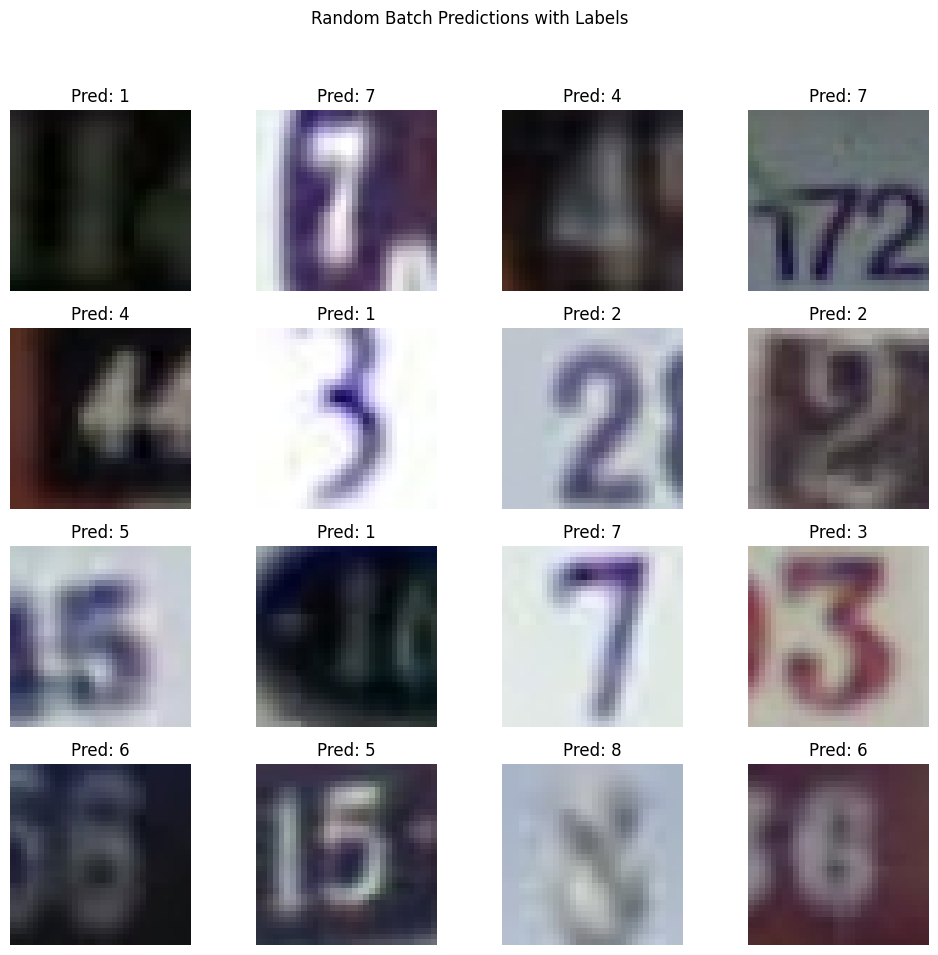

In [ ]:
plot_predicted(test_loader, CNN2)

torch.Size([128, 3, 32, 32]) torch.Size([128])
Label :  tensor(1, dtype=torch.uint8)


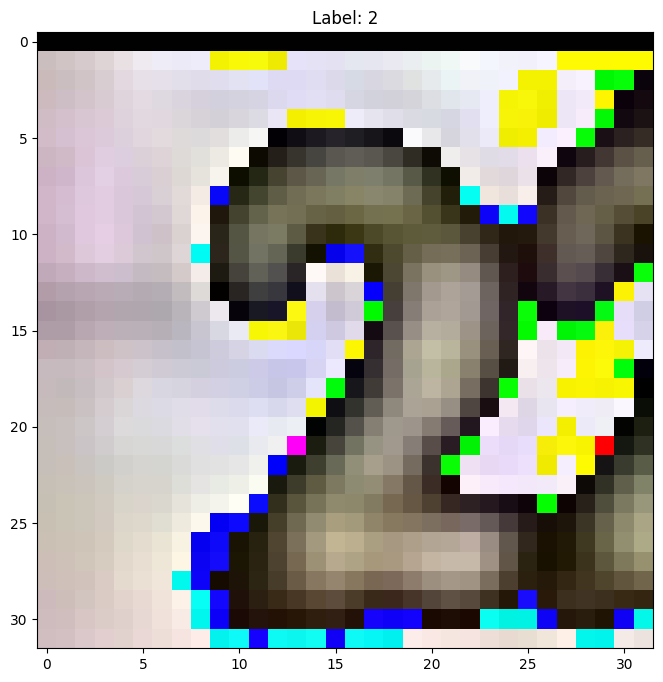

In [ ]:
#DATA AUGMENTATION
tr2 = tf.Compose([
    tf.RandomCrop(32, padding=4),
    tf.ToTensor(),
    tf.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Initialize the custom dataset with the specified transformations
SVHNTrain = SVHN(data_path+'/svhn/train_32x32.mat', tr2)

# Explanation of DataLoader:
# DataLoader is a powerful utility that handles data loading to your model in a way that enhances performance and scalability.
train_loader2 = torch.utils.data.DataLoader(dataset=SVHNTrain,  # The dataset from which to load the data.
                                                batch_size=128,  # The number of samples contained in each generated batch.
                                                shuffle=True)  # Whether to shuffle the data at every epoch to reduce model overfitting.

images, labels = next(iter(train_loader2))
print(images.shape, labels.shape)  # Print the shape of the images and labels tensors
print('Label : ', labels[0])       # Print the first label in the batch
plt.figure(figsize=(8,8))
plt.imshow(tf.ToPILImage()(images[0]))
plt.title(f'Label: {labels[0] + 1}')
plt.show()

In [ ]:
CNN3 = ConvNet2()
CNN3 = CNN3.cuda()
# Cross entropy loss for classification problems
criterion = nn.CrossEntropyLoss()

#Initialize optimizer
learning_rate = .001
optimizer = torch.optim.Adam(CNN3.parameters(), lr = learning_rate)


# Device configuration (choose GPU if it is available )
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
num_epochs = 5

CNN3.train() # Set the model in train mode
total_step = len(train_loader2)
losses_list = []
criterion = nn.CrossEntropyLoss()
# Iterate over epochs
for epoch in range(num_epochs):
    # Iterate the dataset
    loss_avg = 0
    nBatches = 0
    for i, (images, labels) in enumerate(train_loader2):
        # Get batch of samples and labels
        images = images.to(device)
        labels = labels.type(torch.LongTensor).to(device)

        # Forward pass
        outputs = CNN3(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_avg += loss.cpu().item()
        nBatches+=1
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss_avg / nBatches))
    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss_avg / nBatches))
    losses_list.append(loss_avg / nBatches)

Epoch [1/5], Step [100/573], Loss: 2.2434
Epoch [1/5], Step [200/573], Loss: 2.0354
Epoch [1/5], Step [300/573], Loss: 1.7032
Epoch [1/5], Step [400/573], Loss: 1.4635
Epoch [1/5], Step [500/573], Loss: 1.2908
Epoch [1/5], Step [573/573], Loss: 1.1937
Epoch [2/5], Step [100/573], Loss: 0.4958
Epoch [2/5], Step [200/573], Loss: 0.4790
Epoch [2/5], Step [300/573], Loss: 0.4719
Epoch [2/5], Step [400/573], Loss: 0.4563
Epoch [2/5], Step [500/573], Loss: 0.4423
Epoch [2/5], Step [573/573], Loss: 0.4338
Epoch [3/5], Step [100/573], Loss: 0.3607
Epoch [3/5], Step [200/573], Loss: 0.3598
Epoch [3/5], Step [300/573], Loss: 0.3593
Epoch [3/5], Step [400/573], Loss: 0.3571
Epoch [3/5], Step [500/573], Loss: 0.3540
Epoch [3/5], Step [573/573], Loss: 0.3504
Epoch [4/5], Step [100/573], Loss: 0.3223
Epoch [4/5], Step [200/573], Loss: 0.3143
Epoch [4/5], Step [300/573], Loss: 0.3168
Epoch [4/5], Step [400/573], Loss: 0.3127
Epoch [4/5], Step [500/573], Loss: 0.3082
Epoch [4/5], Step [573/573], Loss:

In [ ]:
#accuracy
acc = accuracy(test_loader, CNN3)
print("Test accuracy:", acc)

Test accuracy: 92.02904118008605


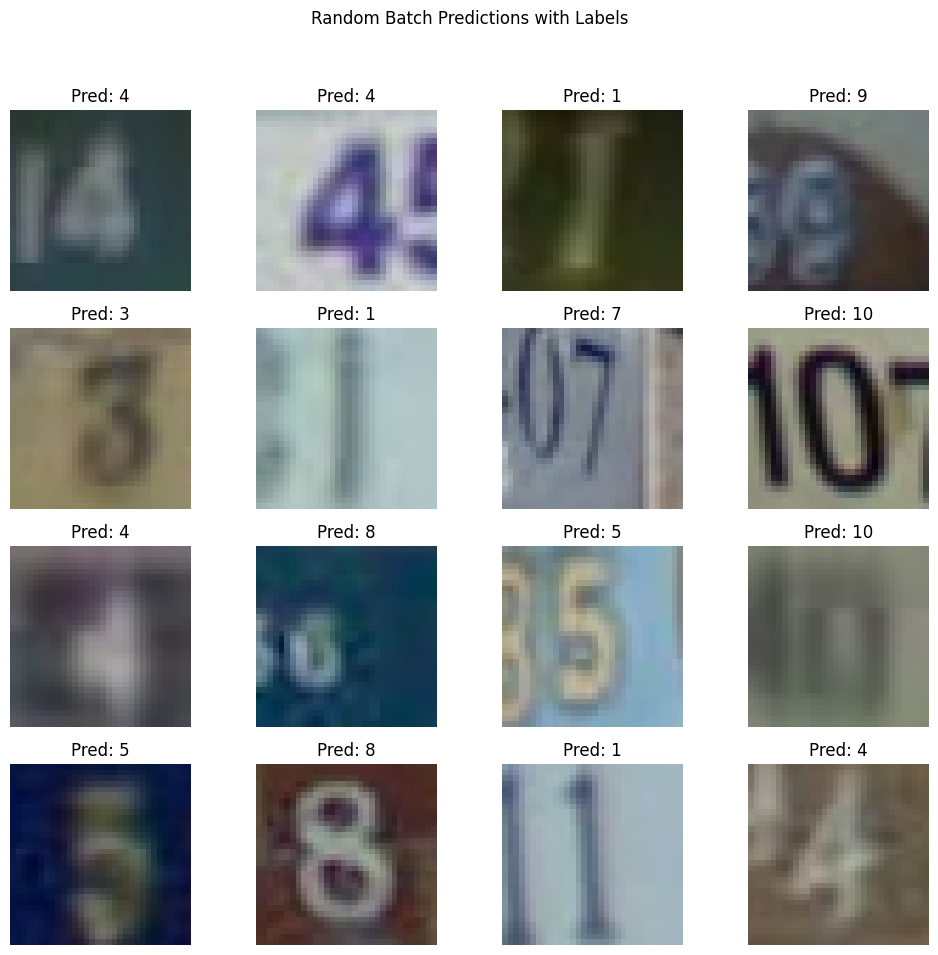

In [ ]:
plot_predicted(test_loader, CNN3)

In [ ]:
#SGD WITH MOMENTUM AND DATA AUGMENTATION

CNN4 = ConvNet2()
CNN4 = CNN4.cuda()
# Cross entropy loss for classification problems
criterion = nn.CrossEntropyLoss()

#Initialize optimizer
learning_rate = .001
optimizer = torch.optim.SGD(CNN4.parameters(), lr = learning_rate, momentum = 0.9)


# Device configuration (choose GPU if it is available )
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
num_epochs = 5

CNN4.train() # Set the model in train mode
total_step = len(train_loader2)
losses_list = []
criterion = nn.CrossEntropyLoss()
# Iterate over epochs
for epoch in range(num_epochs):
    # Iterate the dataset
    loss_avg = 0
    nBatches = 0
    for i, (images, labels) in enumerate(train_loader2):
        # Get batch of samples and labels
        images = images.to(device)
        labels = labels.type(torch.LongTensor).to(device)

        # Forward pass
        outputs = CNN4(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_avg += loss.cpu().item()
        nBatches+=1
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss_avg / nBatches))
    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss_avg / nBatches))
    losses_list.append(loss_avg / nBatches)

Epoch [1/5], Step [100/573], Loss: 2.2869
Epoch [1/5], Step [200/573], Loss: 2.2719
Epoch [1/5], Step [300/573], Loss: 2.2618
Epoch [1/5], Step [400/573], Loss: 2.2557
Epoch [1/5], Step [500/573], Loss: 2.2522
Epoch [1/5], Step [573/573], Loss: 2.2500
Epoch [2/5], Step [100/573], Loss: 2.2410
Epoch [2/5], Step [200/573], Loss: 2.2384
Epoch [2/5], Step [300/573], Loss: 2.2354
Epoch [2/5], Step [400/573], Loss: 2.2374
Epoch [2/5], Step [500/573], Loss: 2.2371
Epoch [2/5], Step [573/573], Loss: 2.2362
Epoch [3/5], Step [100/573], Loss: 2.2275
Epoch [3/5], Step [200/573], Loss: 2.2340
Epoch [3/5], Step [300/573], Loss: 2.2330
Epoch [3/5], Step [400/573], Loss: 2.2351
Epoch [3/5], Step [500/573], Loss: 2.2350
Epoch [3/5], Step [573/573], Loss: 2.2351
Epoch [4/5], Step [100/573], Loss: 2.2356
Epoch [4/5], Step [200/573], Loss: 2.2344
Epoch [4/5], Step [300/573], Loss: 2.2354
Epoch [4/5], Step [400/573], Loss: 2.2340
Epoch [4/5], Step [500/573], Loss: 2.2328
Epoch [4/5], Step [573/573], Loss:

In [ ]:
acc = accuracy(test_loader, CNN4)
print("Test accuracy:", acc)

Test accuracy: 19.587430854333128


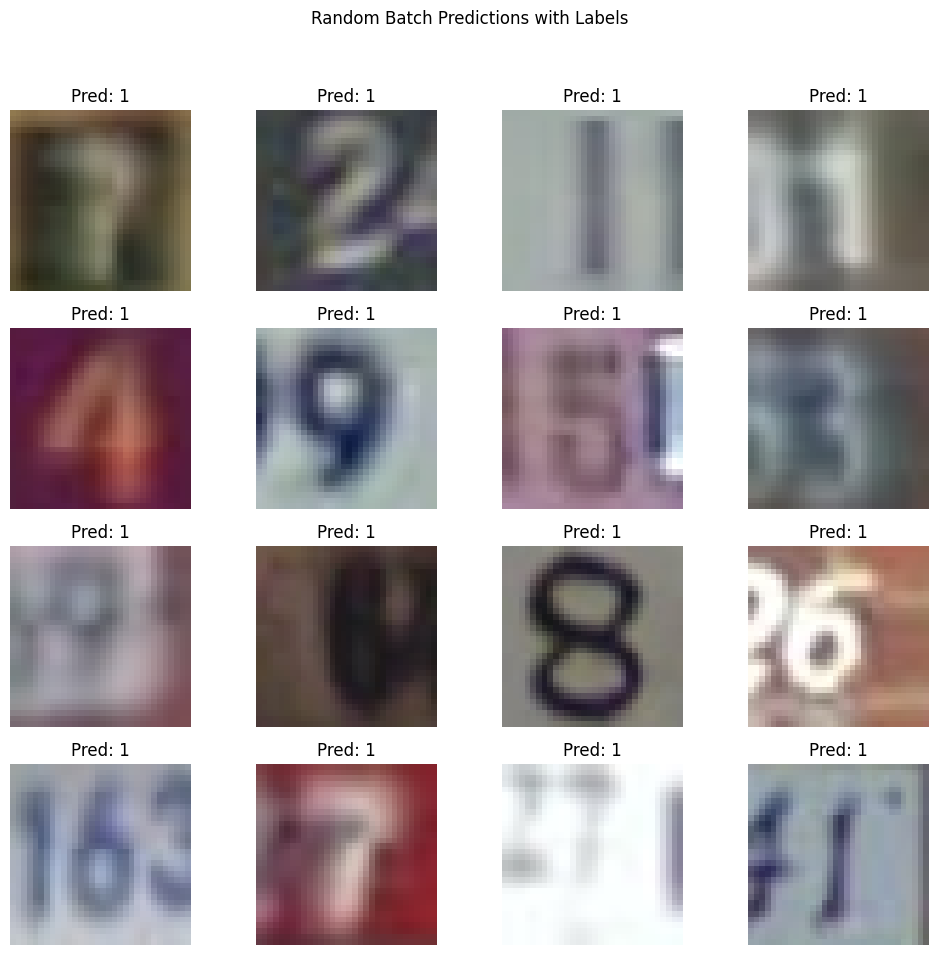

In [ ]:
plot_predicted(test_loader, CNN4)

In [ ]:
#CHANGE OF OPTIMIZER

CNN = ConvNet()
CNN = CNN.cuda()

# Cross entropy loss for classification problems
criterion = nn.CrossEntropyLoss()

#Initialize optimizer
learning_rate = .01
optimizer = torch.optim.SGD(CNN.parameters(), lr = learning_rate, momentum = 0.9)


# Device configuration (choose GPU if it is available )
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
num_epochs = 5


CNN.train() # Set the model in train mode
total_step = len(train_loader)
losses_list = []
criterion = nn.CrossEntropyLoss()
# Iterate over epochs
for epoch in range(num_epochs):
    # Iterate the dataset
    loss_avg = 0
    nBatches = 0
    for i, (images, labels) in enumerate(train_loader):
        # Get batch of samples and labels
        images = images.to(device)
        labels = labels.type(torch.LongTensor).to(device)

        # Forward pass
        outputs = CNN(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_avg += loss.cpu().item()
        nBatches+=1
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss_avg / nBatches))
    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss_avg / nBatches))
    losses_list.append(loss_avg / nBatches)

Epoch [1/5], Step [100/573], Loss: 2.2369
Epoch [1/5], Step [200/573], Loss: 2.1326
Epoch [1/5], Step [300/573], Loss: 1.8203
Epoch [1/5], Step [400/573], Loss: 1.5810
Epoch [1/5], Step [500/573], Loss: 1.4076
Epoch [1/5], Step [573/573], Loss: 1.3146
Epoch [2/5], Step [100/573], Loss: 0.6064
Epoch [2/5], Step [200/573], Loss: 0.5907
Epoch [2/5], Step [300/573], Loss: 0.5861
Epoch [2/5], Step [400/573], Loss: 0.5810
Epoch [2/5], Step [500/573], Loss: 0.5779
Epoch [2/5], Step [573/573], Loss: 0.5726
Epoch [3/5], Step [100/573], Loss: 0.5124
Epoch [3/5], Step [200/573], Loss: 0.5016
Epoch [3/5], Step [300/573], Loss: 0.4994
Epoch [3/5], Step [400/573], Loss: 0.4924
Epoch [3/5], Step [500/573], Loss: 0.4902
Epoch [3/5], Step [573/573], Loss: 0.4859
Epoch [4/5], Step [100/573], Loss: 0.4305
Epoch [4/5], Step [200/573], Loss: 0.4377
Epoch [4/5], Step [300/573], Loss: 0.4331
Epoch [4/5], Step [400/573], Loss: 0.4348
Epoch [4/5], Step [500/573], Loss: 0.4363
Epoch [4/5], Step [573/573], Loss:

In [ ]:
acc = accuracy(test_loader, CNN)
print("Test accuracy:", acc)

Test accuracy: 86.17470805162877


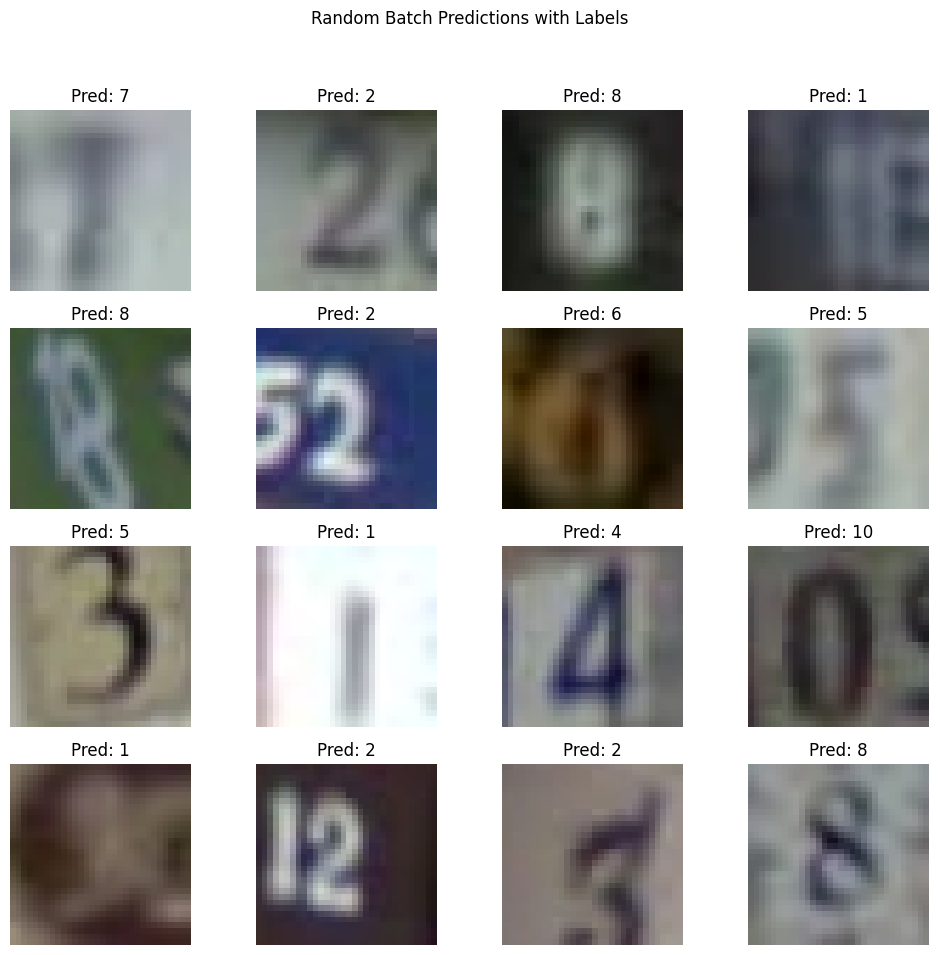

In [ ]:
plot_predicted(test_loader, CNN)

In [ ]:
#ANOTHER TYPE OF CONVNET

class ConvNet7(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet7, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, num_classes)

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.maxpool(out)

        out = self.conv2(out)
        out = self.relu(out)
        out = self.maxpool(out)


        out = out.reshape(out.size(0), -1)
        out = self.dropout(self.relu(self.fc1(out)))
        out = self.fc2(out)

        return out


In [ ]:
CNN6 = ConvNet7()
CNN6 = CNN6.cuda()
# Cross entropy loss for classification problems
criterion = nn.CrossEntropyLoss()

#Initialize optimizer
learning_rate = .001
optimizer = torch.optim.Adam(CNN6.parameters(), lr = learning_rate)


# Device configuration (choose GPU if it is available )
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
num_epochs = 5

CNN6.train() # Set the model in train mode
total_step = len(train_loader2)
losses_list = []
criterion = nn.CrossEntropyLoss()
# Iterate over epochs
for epoch in range(num_epochs):
    # Iterate the dataset
    loss_avg = 0
    nBatches = 0
    for i, (images, labels) in enumerate(train_loader2):
        # Get batch of samples and labels
        images = images.to(device)
        labels = labels.type(torch.LongTensor).to(device)

        # Forward pass
        outputs = CNN6(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_avg += loss.cpu().item()
        nBatches+=1
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss_avg / nBatches))
    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss_avg / nBatches))
    losses_list.append(loss_avg / nBatches)

Epoch [1/5], Step [100/573], Loss: 2.1878
Epoch [1/5], Step [200/573], Loss: 1.8813
Epoch [1/5], Step [300/573], Loss: 1.6629
Epoch [1/5], Step [400/573], Loss: 1.5176
Epoch [1/5], Step [500/573], Loss: 1.4084
Epoch [1/5], Step [573/573], Loss: 1.3430
Epoch [2/5], Step [100/573], Loss: 0.8386
Epoch [2/5], Step [200/573], Loss: 0.8137
Epoch [2/5], Step [300/573], Loss: 0.7899
Epoch [2/5], Step [400/573], Loss: 0.7718
Epoch [2/5], Step [500/573], Loss: 0.7570
Epoch [2/5], Step [573/573], Loss: 0.7462
Epoch [3/5], Step [100/573], Loss: 0.6490
Epoch [3/5], Step [200/573], Loss: 0.6398
Epoch [3/5], Step [300/573], Loss: 0.6372
Epoch [3/5], Step [400/573], Loss: 0.6312
Epoch [3/5], Step [500/573], Loss: 0.6278
Epoch [3/5], Step [573/573], Loss: 0.6262
Epoch [4/5], Step [100/573], Loss: 0.5735
Epoch [4/5], Step [200/573], Loss: 0.5691
Epoch [4/5], Step [300/573], Loss: 0.5632
Epoch [4/5], Step [400/573], Loss: 0.5601
Epoch [4/5], Step [500/573], Loss: 0.5579
Epoch [4/5], Step [573/573], Loss:

In [ ]:
acc = accuracy(test_loader, CNN6)
print("Test accuracy:", acc)

Test accuracy: 86.67025199754148


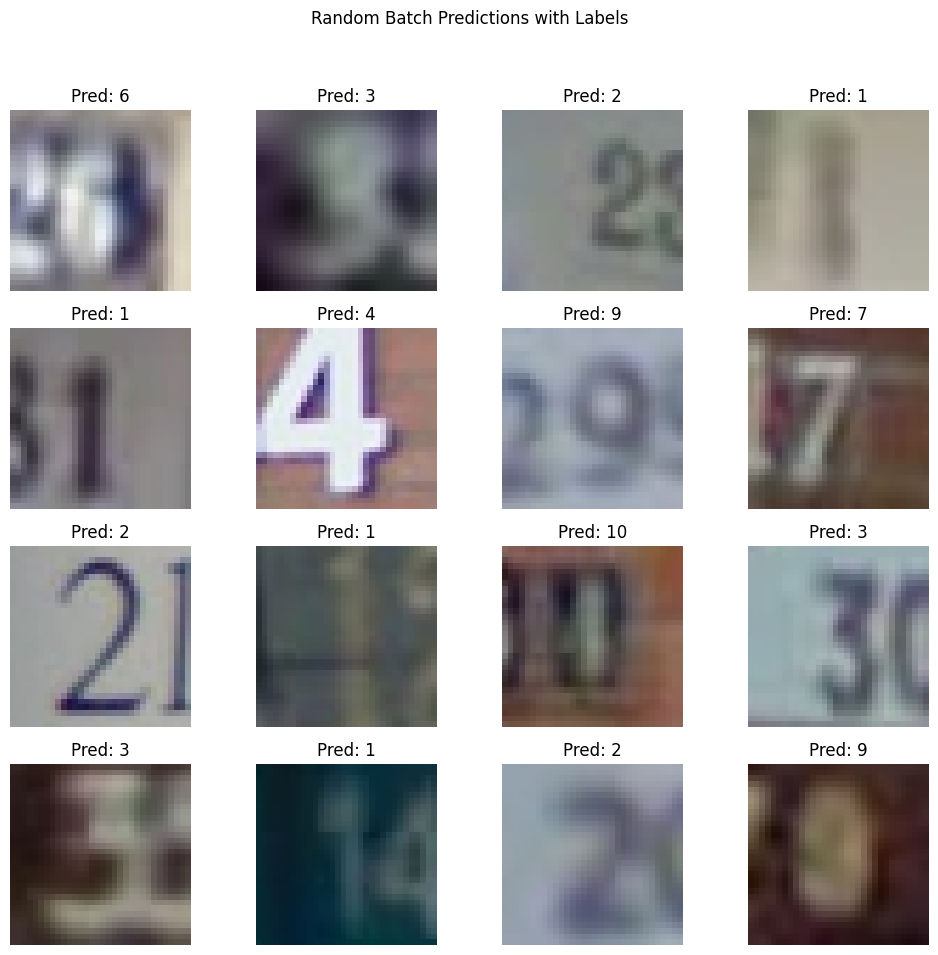

In [ ]:
plot_predicted(test_loader, CNN6)

In [ ]:
# 5 CONV LAYERS
class ConvNet5(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet5, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, padding=1)

        self.fc = nn.Linear(512 * 1 * 1, num_classes)

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.maxpool(out)

        out = self.conv2(out)
        out = self.relu(out)
        out = self.maxpool(out)

        out = self.conv3(out)
        out = self.relu(out)
        out = self.maxpool(out)

        out = self.conv4(out)
        out = self.relu(out)
        out = self.maxpool(out)

        out = self.conv5(out)
        out = self.relu(out)
        out = self.maxpool(out)

        out = out.reshape(out.size(0), -1)
        out = self.fc(out)

        return out


In [ ]:
#5 layers and data augmentation
CNN5 = ConvNet5()
CNN5 = CNN5.cuda()
# Cross entropy loss for classification problems
criterion = nn.CrossEntropyLoss()

#Initialize optimizer
learning_rate = .001
optimizer = torch.optim.Adam(CNN5.parameters(), lr = learning_rate)


# Device configuration (choose GPU if it is available )
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
num_epochs = 5

CNN5.train() # Set the model in train mode
total_step = len(train_loader2)
losses_list = []
criterion = nn.CrossEntropyLoss()
# Iterate over epochs
for epoch in range(num_epochs):
    # Iterate the dataset
    loss_avg = 0
    nBatches = 0
    for i, (images, labels) in enumerate(train_loader2):
        # Get batch of samples and labels
        images = images.to(device)
        labels = labels.type(torch.LongTensor).to(device)

        # Forward pass
        outputs = CNN5(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_avg += loss.cpu().item()
        nBatches+=1
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss_avg / nBatches))
    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch+1, num_epochs, i+1, total_step, loss_avg / nBatches))
    losses_list.append(loss_avg / nBatches)

Epoch [1/5], Step [100/573], Loss: 2.2288
Epoch [1/5], Step [200/573], Loss: 2.0107
Epoch [1/5], Step [300/573], Loss: 1.7228
Epoch [1/5], Step [400/573], Loss: 1.4839
Epoch [1/5], Step [500/573], Loss: 1.3115
Epoch [1/5], Step [573/573], Loss: 1.2127
Epoch [2/5], Step [100/573], Loss: 0.5011
Epoch [2/5], Step [200/573], Loss: 0.4908
Epoch [2/5], Step [300/573], Loss: 0.4722
Epoch [2/5], Step [400/573], Loss: 0.4573
Epoch [2/5], Step [500/573], Loss: 0.4465
Epoch [2/5], Step [573/573], Loss: 0.4382
Epoch [3/5], Step [100/573], Loss: 0.3660
Epoch [3/5], Step [200/573], Loss: 0.3619
Epoch [3/5], Step [300/573], Loss: 0.3644
Epoch [3/5], Step [400/573], Loss: 0.3607
Epoch [3/5], Step [500/573], Loss: 0.3518
Epoch [3/5], Step [573/573], Loss: 0.3482
Epoch [4/5], Step [100/573], Loss: 0.3200
Epoch [4/5], Step [200/573], Loss: 0.3175
Epoch [4/5], Step [300/573], Loss: 0.3172
Epoch [4/5], Step [400/573], Loss: 0.3121
Epoch [4/5], Step [500/573], Loss: 0.3107
Epoch [4/5], Step [573/573], Loss:

In [ ]:
acc = accuracy(test_loader, CNN5)
print("Test accuracy:", acc)

Test accuracy: 91.91763982790411


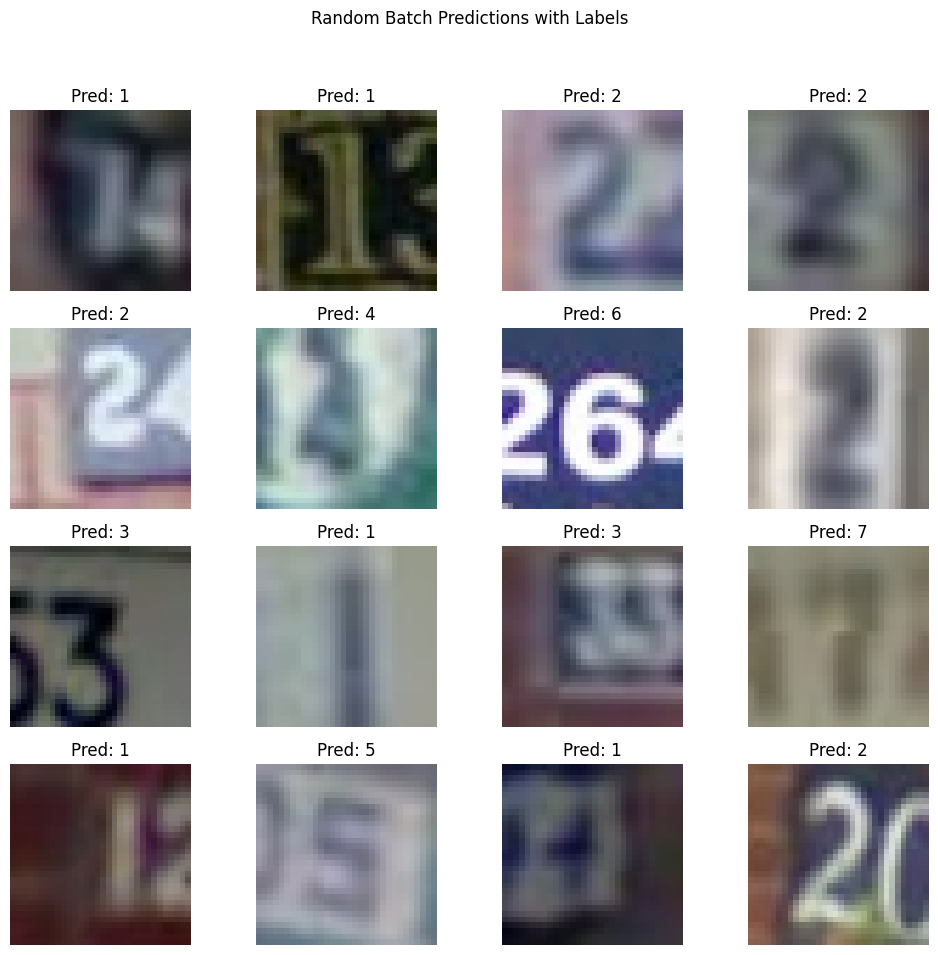

In [ ]:
plot_predicted(test_loader, CNN5)

# Ex. 2

# **Building your own efficient Convolutional Network architecture for SVHN**

In the following,  you will need to build your own CNN architecture to predict digit numbers on the SVHN dataset. You are completely free to use any kind of layers and hyper-parameters for this purpose. Your goal is to acheive the maximum possible accuracy on the test set (the better, the higher score you'll get in the exercice). The only constraint is that your model should not contain more than 150K parameters. Below, we provide a simple code to compute the number of parameters in a model.

## Computing model parameters

In [ ]:
# Compute model paramters
def compute_model_params(model):
  params = 0
  for p in model.parameters():
    params+= p.numel()
  return params

In [ ]:
import torch
import torch.nn as nn

# ResNet style network
class ResSim(nn.Module):
    def __init__(self, num_classes=10):

        super(ResSim, self).__init__()

        self.conv11 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.conv12 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)

        self.conv21 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv22 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)

        self.fc = nn.Linear(8*8*64, num_classes)

        self.maxpool= nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()

    def forward(self, x):

        out11 = self.relu(self.conv11(x))
        out12 = self.relu(self.conv12(out11)) + out11

        out = self.maxpool(out12)

        out21 = self.relu(self.conv21(out))
        out = self.relu(self.conv22(out21)) + out21
        out = self.maxpool(out)

        #print(out.shape)
        out = out.view(out.size(0), -1)
        out = self.fc(out)

        return out
# Initialize the model
model = ResSim(num_classes=10)
# Compute and print number of params
n_params = compute_model_params(model)
print("ResNet Parameters: " + str(n_params)) ##
print("THIS MODEL CONTAINS 153K PARAMS, IT IS CONSIDERED NOT VALID FOR THE EXERCICE!!!!!!")

ResNet Parameters: 153546
THIS MODEL CONTAINS 153K PARAMS, IT IS CONSIDERED NOT VALID FOR THE EXERCICE!!!!!!


In [ ]:
'''
1. Design and implement your own CNN. Given that the number of parameters must be small, you can check some papers focused on efficient CNN architectures and get some ideas.
  - MobileNet: https://arxiv.org/abs/1704.04861
  - MobileNet V2: https://arxiv.org/pdf/1801.04381.pdf
  - SqueezeNet: https://arxiv.org/abs/1602.07360
  - ShuffleNet: https://arxiv.org/abs/1707.01083
  - ESPNet V2: https://arxiv.org/abs/1811.11431
2. Train it and test it on SVHN using the provided code.
3. Discuss what approaches have you tried, why, and which ones have shown to be more beneficial.
'''


'\n1. Design and implement your own CNN. Given that the number of parameters must be small, you can check some papers focused on efficient CNN architectures and get some ideas.\n  - MobileNet: https://arxiv.org/abs/1704.04861\n  - MobileNet V2: https://arxiv.org/pdf/1801.04381.pdf\n  - SqueezeNet: https://arxiv.org/abs/1602.07360\n  - ShuffleNet: https://arxiv.org/abs/1707.01083\n  - ESPNet V2: https://arxiv.org/abs/1811.11431\n2. Train it and test it on SVHN using the provided code.\n3. Discuss what approaches have you tried, why, and which ones have shown to be more beneficial.\n'

## Sol. 2

### Define your own model and check the number of total parameters

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MyModel(nn.Module):
    def __init__(self, num_classes=10, dropout_rate=0.5):
        super(MyModel, self).__init__()

        # Initial Convolutional Block
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Depthwise Separable Convolution Blocks
        self.dwconv1 = nn.Conv2d(32, 32, kernel_size=3, groups=32, padding=1)
        self.pwconv1 = nn.Conv2d(32, 32, kernel_size=1)
        self.bn2 = nn.BatchNorm2d(32)

        self.dwconv2 = nn.Conv2d(32, 64, kernel_size=3, groups=32, padding=1)
        self.pwconv2 = nn.Conv2d(64, 64, kernel_size=1)
        self.bn3 = nn.BatchNorm2d(64)

        # Additional Convolutional Blocks
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(64)

        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(64)

        self.residual_conv = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn_res = nn.BatchNorm2d(64)

        # Global Average Pooling and Fully Connected Layer
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(64, num_classes)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.maxpool(x)

        x = self.relu(self.bn2(self.pwconv1(self.dwconv1(x))))
        x = self.maxpool(x)

        x = self.relu(self.bn3(self.pwconv2(self.dwconv2(x))))
        x = self.maxpool(x)

        x = self.relu(self.bn4(self.conv3(x)))
        x = self.relu(self.bn5(self.conv4(x)))
        x = self.maxpool(x)

        identity = x
        out = self.relu(self.bn_res(self.residual_conv(x)))
        x = x + identity
        x = self.relu(x)

        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)

        return x

# Helper function to compute the number of parameters
def compute_model_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Initialize the model and compute the number of parameters
model = MyModel(num_classes=10, dropout_rate=0.6)
n_params = compute_model_params(model)
print("MyModel Parameters: " + str(n_params))
#89 accuracy

MyModel Parameters: 119146


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MyModel(nn.Module):
    def __init__(self, num_classes=10, dropout_rate=0.5):
        super(MyModel, self).__init__()

        # New Convolutional Layer at the beginning
        self.conv0 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn0 = nn.BatchNorm2d(32)

        # Initial Convolutional Block
        self.conv1 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Depthwise Separable Convolution Blocks
        self.dwconv1 = nn.Conv2d(32, 32, kernel_size=3, groups=32, padding=1)
        self.pwconv1 = nn.Conv2d(32, 32, kernel_size=1)
        self.bn2 = nn.BatchNorm2d(32)

        self.dwconv2 = nn.Conv2d(32, 32, kernel_size=3, groups=32, padding=1)
        self.pwconv2 = nn.Conv2d(32, 32, kernel_size=1)
        self.bn3 = nn.BatchNorm2d(32)

        # Additional Convolutional Blocks
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(64)

        # New Convolutional Layer
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(64)

        # Another Convolutional Layer
        self.conv5 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(64)

        # Residual Convolutional Layer
        self.residual_conv = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn_res = nn.BatchNorm2d(64)

        # Global Average Pooling and Fully Connected Layer
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(64, num_classes)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        # New Convolutional Layer at the beginning
        x = self.relu(self.bn0(self.conv0(x)))

        # Initial Convolutional Block
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.maxpool(x)

        x = self.relu(self.bn2(self.pwconv1(self.dwconv1(x))))
        x = self.maxpool(x)

        x = self.relu(self.bn3(self.pwconv2(self.dwconv2(x))))
        x = self.maxpool(x)

        x = self.relu(self.bn4(self.conv3(x)))

        # New Convolutional Layer
        x = self.relu(self.bn5(self.conv4(x)))

        # Another Convolutional Layer
        x = self.relu(self.bn6(self.conv5(x)))

        # Residual Connection
        identity = x
        out = self.relu(self.bn_res(self.residual_conv(x)))
        x = x + identity

        x = self.relu(x)

        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)

        return x

# Helper function to compute the number of parameters
def compute_model_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Initialize the model and compute the number of parameters
model = MyModel(num_classes=10, dropout_rate=0.3)
n_params = compute_model_params(model)
print("MyModel Parameters: " + str(n_params))
#91 ACCURACY



MyModel Parameters: 143594


### Train your model on SVHN
It is not allowed to change training hyper-parameters such as learning rate, batch size or number of epochs. You can only modify the architecture definition.

In [ ]:
## Create SVHN database

# All the data will be loaded from the provided file in Data/mnist.t
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as tf
import matplotlib.pyplot as plt
from PIL import Image
import scipy.io as sio
from google.colab import drive
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/DL_yo/P3/Data'
results_path = '/content/drive/MyDrive/DL_yo/P3/Results/'

#Making native class loader
class SVHN(torch.utils.data.Dataset):

    # Initialization method for the dataset
    def __init__(self,dataDir = data_path+'/svhn/train_32x32.mat',transform = None):
        mat_loaded = sio.loadmat(dataDir)
        self.data = mat_loaded['X']
        self.labels = mat_loaded['y'].squeeze()
        self.labels -= self.labels.min()
        self.transform = transform
     # What to do to load a single item in the dataset ( read image and label)
    def __getitem__(self, index):
        data = self.data[:,:,:,index]
        lbl = self.labels[index]

        data = Image.fromarray(data)
        # Apply a trasnformaiton to the image if it is indicated in the initalizer
        if self.transform is not None :
            data = self.transform(data)

        # return the image and the label
        return data,lbl

        pass

    # Return the number of images
    def __len__(self):
        return self.data.shape[3]

# Create train data loader
tr = tf.Compose([
        tf.ToTensor(),
        tf.Normalize(mean = [.5], std = [.5])
        ])
SVHNTrain = SVHN(data_path+'/svhn/train_32x32.mat',tr)
train_loader = torch.utils.data.DataLoader(dataset=SVHNTrain,
                                               batch_size=256,
                                               shuffle=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Train function
def train(CNN, train_loader, optimizer, num_epochs=5, model_name='model.ckpt', device='cpu'):
    CNN.train() # Set the model in train mode
    total_step = len(train_loader)
    losses_list = []
    criterion = nn.CrossEntropyLoss()
    # Iterate over epochs
    for epoch in range(num_epochs):
        # Iterate the dataset
        loss_avg = 0
        nBatches = 0
        for i, (images, labels) in enumerate(train_loader):
            # Get batch of samples and labels
            images = images.to(device)
            labels = labels.type(torch.LongTensor).to(device)

            # Forward pass
            outputs = CNN(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_avg += loss.cpu().item()
            nBatches+=1
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                       .format(epoch+1, num_epochs, i+1, total_step, loss_avg / nBatches))
        print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                       .format(epoch+1, num_epochs, i+1, total_step, loss_avg / nBatches))
        losses_list.append(loss_avg / nBatches)
        torch.save(CNN.state_dict(), results_path+ '/' + model_name)

    return losses_list

# Test funcion
def test(CNN, test_loader):
  with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            # get network predictions
            outputs = CNN(images)

            # get predicted class
            _, predicted = torch.max(outputs.data, 1)

            # compare with the ground-truth
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        # return accuracy
        return 100 * correct / total

In [ ]:
#Train MyModel
my_model = MyModel()

#Initialize optimizer
learning_rate = .1
optimizer = torch.optim.SGD(my_model.parameters(),lr = learning_rate,
                            weight_decay=1e-5, momentum=0.9)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
my_model = my_model.to(device)

losses_list = train(my_model, train_loader, optimizer, num_epochs=10, model_name='my_net.ckpt', device=device)


Epoch [1/10], Step [100/287], Loss: 1.6803
Epoch [1/10], Step [200/287], Loss: 1.2298
Epoch [1/10], Step [287/287], Loss: 1.0354
Epoch [2/10], Step [100/287], Loss: 0.5010
Epoch [2/10], Step [200/287], Loss: 0.4748
Epoch [2/10], Step [287/287], Loss: 0.4681
Epoch [3/10], Step [100/287], Loss: 0.4196
Epoch [3/10], Step [200/287], Loss: 0.3974
Epoch [3/10], Step [287/287], Loss: 0.3961
Epoch [4/10], Step [100/287], Loss: 0.3585
Epoch [4/10], Step [200/287], Loss: 0.3516
Epoch [4/10], Step [287/287], Loss: 0.3472
Epoch [5/10], Step [100/287], Loss: 0.3070
Epoch [5/10], Step [200/287], Loss: 0.3147
Epoch [5/10], Step [287/287], Loss: 0.3139
Epoch [6/10], Step [100/287], Loss: 0.2809
Epoch [6/10], Step [200/287], Loss: 0.2898
Epoch [6/10], Step [287/287], Loss: 0.2921
Epoch [7/10], Step [100/287], Loss: 0.2745
Epoch [7/10], Step [200/287], Loss: 0.2683
Epoch [7/10], Step [287/287], Loss: 0.2725
Epoch [8/10], Step [100/287], Loss: 0.2485
Epoch [8/10], Step [200/287], Loss: 0.2497
Epoch [8/10

### Test your model
As a reference, 93% of accuracy can be easily achieved by using only ~55000 parameters.

In [ ]:
# Show results for all the trained models
SVHNTest = SVHN(data_path+'/svhn/test_32x32.mat',tr)
test_loader = torch.utils.data.DataLoader(dataset=SVHNTest,
                                               batch_size=256,
                                               shuffle=True)

#
my_net = MyModel()
my_net.load_state_dict(torch.load(results_path + '/my_net.ckpt'))
my_net.cuda()
acc = test(my_net, test_loader)
print('Accuracy MyNet: ' + str(acc))

Accuracy MyNet: 91.279963122311


# Ex. 3

In [ ]:
'''
1. Use the implemented architecture in the previous exercice to solve the transfer learning
   task provided in the examples.
2. Try to fine-tune not only the last layer for the CNN but a larger subset of parameters.
2. Report the test accuracy in each case and discuss the results.
'''

'\n1. Use the implemented architecture in the previous exercice to solve the transfer learning\n   task provided in the examples.\n2. Try to fine-tune not only the last layer for the CNN but a larger subset of parameters.\n2. Report the test accuracy in each case and discuss the results.\n'

## Sol. 3

### Initialize DataLoaders for Transfer Learning experiment

In [ ]:
# Big dataset with numbers from 1 to 8
SVHNTrain_TL = SVHN(data_path+'/svhn_tl/tl_train_32x32.mat',tr)
tl_train_loader = torch.utils.data.DataLoader(dataset=SVHNTrain_TL,
                                               batch_size=256,
                                               shuffle=True)

# 200 samples of 0s and 9s
SVHNTrain_TL_0_9 = SVHN(data_path+'/svhn_tl/tl_train_9_10_32x32.mat',tr)
tl_train_loader_0_9 = torch.utils.data.DataLoader(dataset=SVHNTrain_TL_0_9,
                                                  batch_size=64,
                                                  shuffle=True)
# Test dataset with 0 and 9s
SVHNTest_TL_0_9 = SVHN(data_path+'/svhn_tl/tl_test_9_10_32x32.mat',tr)
tl_test_loader_0_9 = torch.utils.data.DataLoader(dataset=SVHNTest_TL_0_9,
                                                  batch_size=64,
                                                  shuffle=True)

### Pre-train your model with the big dataset with numbers from 1 to 8

In [ ]:
#Train ResNet
resnet_tl = MyModel(num_classes=8)
#Initialize optimizer
learning_rate = .1
optimizer = torch.optim.SGD(resnet_tl.parameters(),lr = learning_rate, weight_decay=1e-5, momentum=0.9)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
resnet_tl = resnet_tl.to(device)

losses_it = train(resnet_tl, tl_train_loader, optimizer, num_epochs=10, model_name='tl_mynet_svhn.ckpt', device=device)


Epoch [1/10], Step [100/249], Loss: 1.4319
Epoch [1/10], Step [200/249], Loss: 1.0709
Epoch [1/10], Step [249/249], Loss: 0.9679
Epoch [2/10], Step [100/249], Loss: 0.4686
Epoch [2/10], Step [200/249], Loss: 0.4487
Epoch [2/10], Step [249/249], Loss: 0.4427
Epoch [3/10], Step [100/249], Loss: 0.3584
Epoch [3/10], Step [200/249], Loss: 0.3523
Epoch [3/10], Step [249/249], Loss: 0.3518
Epoch [4/10], Step [100/249], Loss: 0.3149
Epoch [4/10], Step [200/249], Loss: 0.3167
Epoch [4/10], Step [249/249], Loss: 0.3145
Epoch [5/10], Step [100/249], Loss: 0.2719
Epoch [5/10], Step [200/249], Loss: 0.2781
Epoch [5/10], Step [249/249], Loss: 0.2803
Epoch [6/10], Step [100/249], Loss: 0.2526
Epoch [6/10], Step [200/249], Loss: 0.2564
Epoch [6/10], Step [249/249], Loss: 0.2585
Epoch [7/10], Step [100/249], Loss: 0.2354
Epoch [7/10], Step [200/249], Loss: 0.2383
Epoch [7/10], Step [249/249], Loss: 0.2377
Epoch [8/10], Step [100/249], Loss: 0.2180
Epoch [8/10], Step [200/249], Loss: 0.2219
Epoch [8/10

### Fine-tune the pretrained network with the small dataset of 9s and 0s

In [ ]:
# Case 1: Fine-tune the last 2 layers
resnet_tl = MyModel(num_classes=8)
resnet_tl.load_state_dict(torch.load(results_path + 'tl_mynet_svhn.ckpt'))

in_features = resnet_tl.fc.in_features
resnet_tl.fc = nn.Linear(in_features, 2)

for name, param in resnet_tl.named_parameters():
    if 'residual_conv' in name or 'fc' in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
resnet_tl = resnet_tl.to(device)

learning_rate = 0.01
optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, resnet_tl.parameters()), lr=learning_rate, weight_decay=1e-5, momentum=0.9)

train(resnet_tl, tl_train_loader_0_9, optimizer, num_epochs=20, model_name='tl_mynet_finetuned_svhn.ckpt', device=device)
acc = test(resnet_tl, tl_test_loader_0_9)
print('Accuracy MyModel Transfer Learning Case 1: ' + str(acc))

Epoch [1/20], Step [4/4], Loss: 0.6703
Epoch [2/20], Step [4/4], Loss: 0.5899
Epoch [3/20], Step [4/4], Loss: 0.4775
Epoch [4/20], Step [4/4], Loss: 0.4565
Epoch [5/20], Step [4/4], Loss: 0.3702
Epoch [6/20], Step [4/4], Loss: 0.3794
Epoch [7/20], Step [4/4], Loss: 0.3349
Epoch [8/20], Step [4/4], Loss: 0.2848
Epoch [9/20], Step [4/4], Loss: 0.3505
Epoch [10/20], Step [4/4], Loss: 0.3707
Epoch [11/20], Step [4/4], Loss: 0.2969
Epoch [12/20], Step [4/4], Loss: 0.3289
Epoch [13/20], Step [4/4], Loss: 0.3653
Epoch [14/20], Step [4/4], Loss: 0.3056
Epoch [15/20], Step [4/4], Loss: 0.3121
Epoch [16/20], Step [4/4], Loss: 0.2977
Epoch [17/20], Step [4/4], Loss: 0.3367
Epoch [18/20], Step [4/4], Loss: 0.3242
Epoch [19/20], Step [4/4], Loss: 0.3998
Epoch [20/20], Step [4/4], Loss: 0.4078
Accuracy MyModel Transfer Learning Case 1: 84.3201870947167


In [ ]:
# Case 2: Fine-tune the last 3 layers
resnet_tl = MyModel(num_classes=8)
resnet_tl.load_state_dict(torch.load(results_path + 'tl_mynet_svhn.ckpt'))


for name, param in resnet_tl.named_parameters():
    if 'residual_conv' in name or 'fc' in name or 'conv5' in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
resnet_tl = resnet_tl.to(device)

learning_rate = 0.01
optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, resnet_tl.parameters()), lr=learning_rate, weight_decay=1e-5, momentum=0.9)

train(resnet_tl, tl_train_loader_0_9, optimizer, num_epochs=20, model_name='tl_mynet_finetuned_svhn.ckpt', device=device)
acc = test(resnet_tl, tl_test_loader_0_9)
print('Accuracy MyModel Transfer Learning Case 2: ' + str(acc))

Epoch [1/20], Step [4/4], Loss: 7.6050
Epoch [2/20], Step [4/4], Loss: 5.2801
Epoch [3/20], Step [4/4], Loss: 3.1134
Epoch [4/20], Step [4/4], Loss: 1.5305
Epoch [5/20], Step [4/4], Loss: 0.9472
Epoch [6/20], Step [4/4], Loss: 0.5246
Epoch [7/20], Step [4/4], Loss: 0.5767
Epoch [8/20], Step [4/4], Loss: 0.3432
Epoch [9/20], Step [4/4], Loss: 0.6584
Epoch [10/20], Step [4/4], Loss: 0.3770
Epoch [11/20], Step [4/4], Loss: 0.4063
Epoch [12/20], Step [4/4], Loss: 0.3571
Epoch [13/20], Step [4/4], Loss: 0.2544
Epoch [14/20], Step [4/4], Loss: 0.2005
Epoch [15/20], Step [4/4], Loss: 0.2114
Epoch [16/20], Step [4/4], Loss: 0.2418
Epoch [17/20], Step [4/4], Loss: 0.2145
Epoch [18/20], Step [4/4], Loss: 0.4597
Epoch [19/20], Step [4/4], Loss: 0.2581
Epoch [20/20], Step [4/4], Loss: 0.5278
Accuracy MyModel Transfer Learning Case 2: 87.07345593706815


In [ ]:
# Case 3: Fine-tune all layers
resnet_tl = MyModel(num_classes=8)
resnet_tl.load_state_dict(torch.load(results_path + 'tl_mynet_svhn.ckpt'))


for name, param in resnet_tl.named_parameters():
        param.requires_grad = True

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
resnet_tl = resnet_tl.to(device)

learning_rate = 0.01
optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, resnet_tl.parameters()), lr=learning_rate, weight_decay=1e-5, momentum=0.9)

train(resnet_tl, tl_train_loader_0_9, optimizer, num_epochs=20, model_name='tl_mynet_finetuned_svhn.ckpt', device=device)
acc = test(resnet_tl, tl_test_loader_0_9)
print('Accuracy MyModel Transfer Learning Case 3: ' + str(acc))


Epoch [1/20], Step [4/4], Loss: 6.6594
Epoch [2/20], Step [4/4], Loss: 2.0407
Epoch [3/20], Step [4/4], Loss: 0.4725
Epoch [4/20], Step [4/4], Loss: 0.2275
Epoch [5/20], Step [4/4], Loss: 0.1542
Epoch [6/20], Step [4/4], Loss: 0.1699
Epoch [7/20], Step [4/4], Loss: 0.2383
Epoch [8/20], Step [4/4], Loss: 0.0647
Epoch [9/20], Step [4/4], Loss: 0.0720
Epoch [10/20], Step [4/4], Loss: 0.2866
Epoch [11/20], Step [4/4], Loss: 0.1232
Epoch [12/20], Step [4/4], Loss: 0.0353
Epoch [13/20], Step [4/4], Loss: 0.0261
Epoch [14/20], Step [4/4], Loss: 0.0400
Epoch [15/20], Step [4/4], Loss: 0.0514
Epoch [16/20], Step [4/4], Loss: 0.0255
Epoch [17/20], Step [4/4], Loss: 0.0299
Epoch [18/20], Step [4/4], Loss: 0.0288
Epoch [19/20], Step [4/4], Loss: 0.0209
Epoch [20/20], Step [4/4], Loss: 0.0109
Accuracy MyModel Transfer Learning Case 3: 90.53896034867651


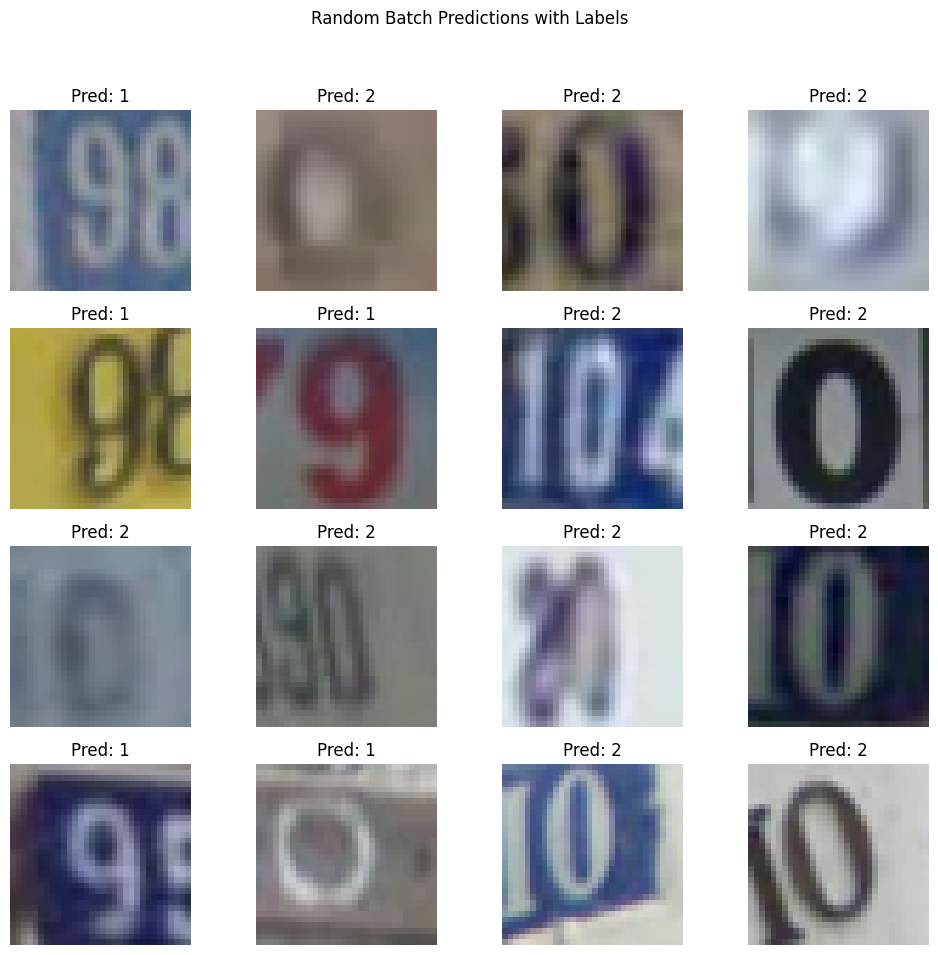

In [ ]:
plot_predicted(tl_test_loader_0_9, resnet_tl)
#class predicted 1 corresponds to number 9
#class predicted 2 correspodns to number 0